In [1]:
from datetime import datetime
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from dataset import CustomDataset

In [2]:
N = 200
k = 50

In [ ]:
# N= 200
# k = 50
# EPOCHS = 20

# Zwiększenie danych (więcej wierszy w pliku) +
# batch_size (50 daje gorsze wyniki niż 20, a 10 daje jeszcze lepsze, dla 1 gorsze i bardzo wydłuża się czas liczenia) +
# lr = 0,01 (bardzo słabe wyniki) -
# momentum = 0,5 (gorsze wyniki) -
# zmiana ukrytej warstwy (trochę lepsze wyniki) +

In [3]:
class LVPredictorNetwork(nn.Module):
    def __init__(self):
        super(LVPredictorNetwork, self).__init__()
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2 * N, N + k, bias=False).double(),
            nn.ReLU(),
            nn.Linear(N + k, (N + k)//2, bias=False).double(),
            nn.ReLU(),
            nn.Linear((N + k)//2, 2 * k, bias=False).double(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x.to('cpu'))
        return logits

In [4]:
training_data = CustomDataset("dane_treningowe_2000.csv", N, k)
test_data = CustomDataset("dane_treningowe_100.csv", N, k)

train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=True)

model = LVPredictorNetwork()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [5]:
def train_one_epoch(epoch_index, tb_writer, batch_num=10):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting

    for i, data in enumerate(train_dataloader):
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % batch_num == batch_num - 1:
            last_loss = running_loss / batch_num  # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_data) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [6]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 20

best_validation_loss = 1_000_000.

EPOCH 1:
  batch 10 loss: 11.96102155219447
  batch 20 loss: 10.196298562696283
  batch 30 loss: 11.069706027309216
  batch 40 loss: 8.158275923577609
  batch 50 loss: 11.637919263059043
  batch 60 loss: 9.528512768298674
  batch 70 loss: 8.125319606312619
  batch 80 loss: 6.7081645795022
  batch 90 loss: 8.602757046242141
  batch 100 loss: 9.967482731247648
  batch 110 loss: 5.629715578626938
  batch 120 loss: 7.954350615105431
  batch 130 loss: 6.957235401630929
  batch 140 loss: 9.81655285406573
  batch 150 loss: 6.924087026796151
  batch 160 loss: 8.60119469171293
  batch 170 loss: 7.273999831391959
  batch 180 loss: 7.114266140462033
  batch 190 loss: 8.815772027641266
  batch 200 loss: 6.612284966652285


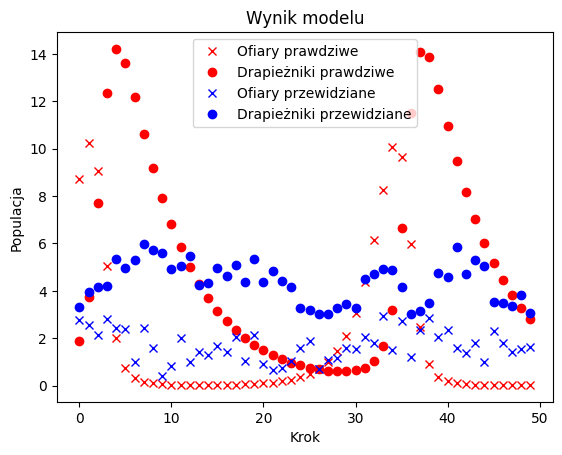

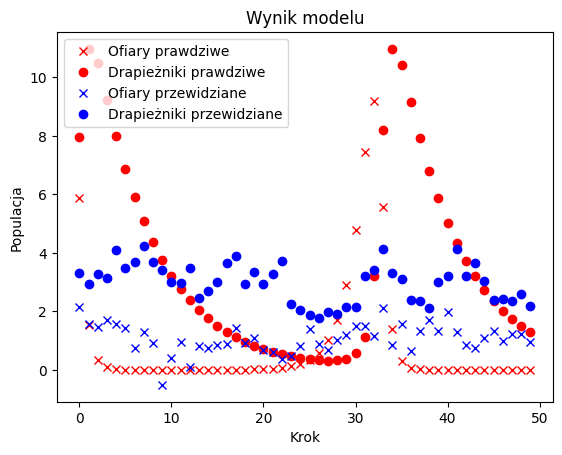

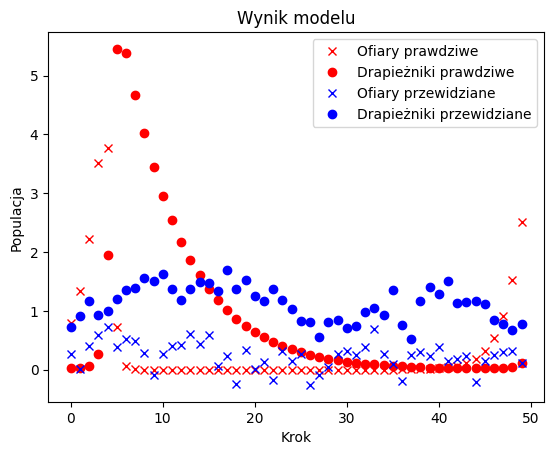

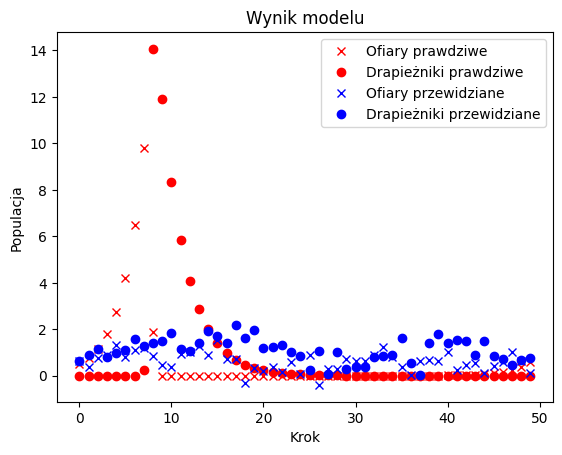

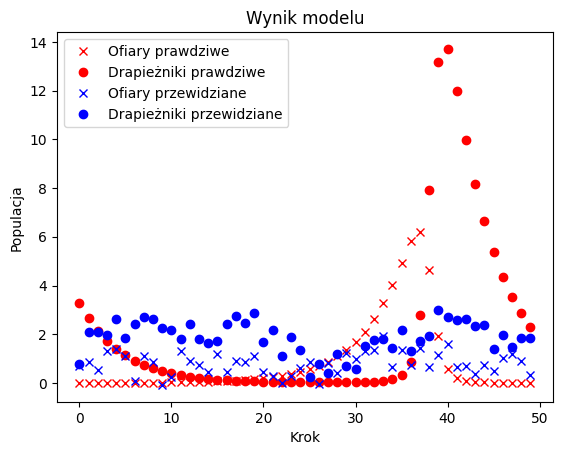

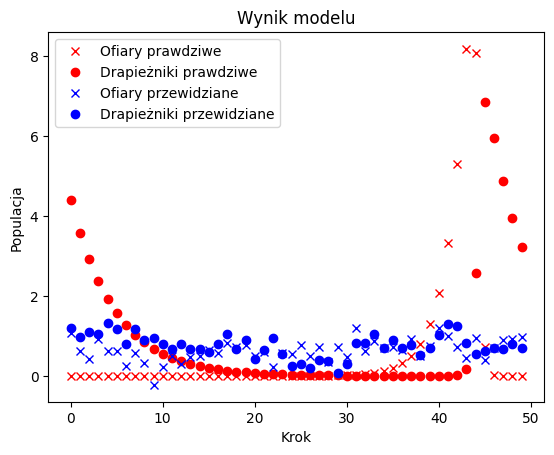

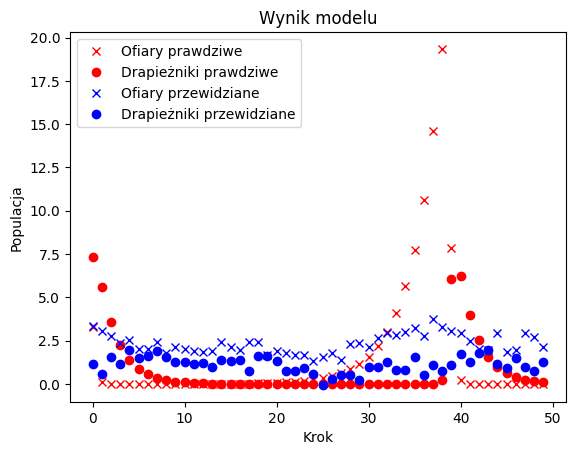

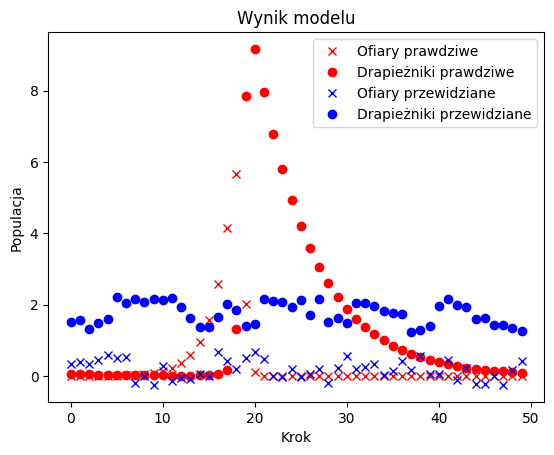

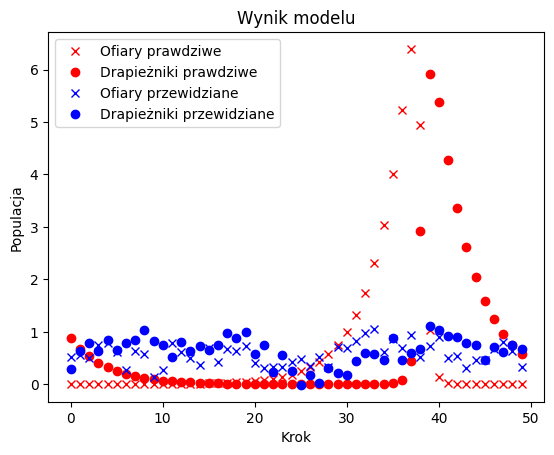

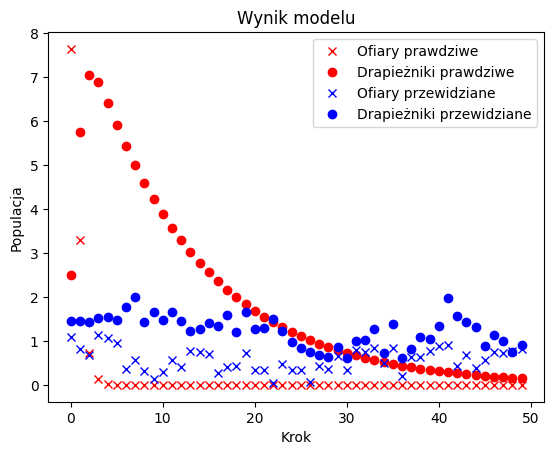

tensor(6.9797, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 2:
  batch 10 loss: 7.41955833821919
  batch 20 loss: 7.5060466258129654
  batch 30 loss: 7.9490867993407335
  batch 40 loss: 6.62520674874655
  batch 50 loss: 5.296841954332796
  batch 60 loss: 6.249683813341759
  batch 70 loss: 7.812678163496716
  batch 80 loss: 8.411524091897492
  batch 90 loss: 7.47015519776816
  batch 100 loss: 7.482366816935972
  batch 110 loss: 6.941788890767209
  batch 120 loss: 6.800761808988385
  batch 130 loss: 8.523569563679276
  batch 140 loss: 6.652208154908469
  batch 150 loss: 8.503534501265072
  batch 160 loss: 6.152634646777382
  batch 170 loss: 7.328482268806096
  batch 180 loss: 8.789855095735387
  batch 190 loss: 5.815324243016732
  batch 200 loss: 6.8251041859826795


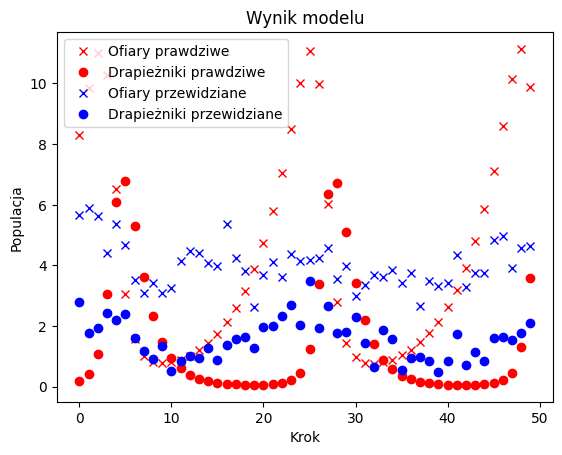

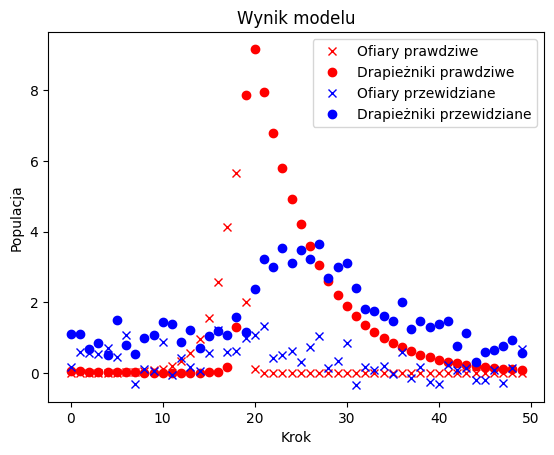

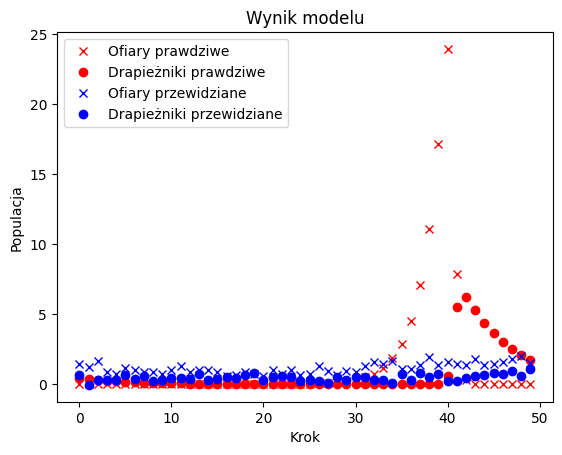

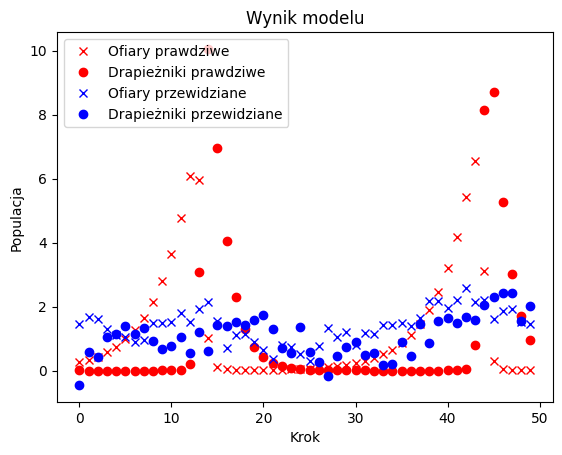

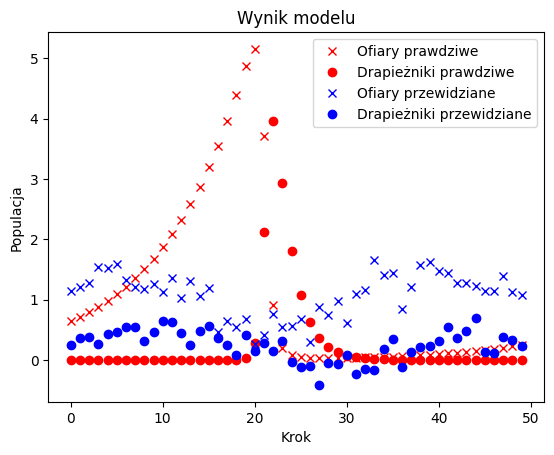

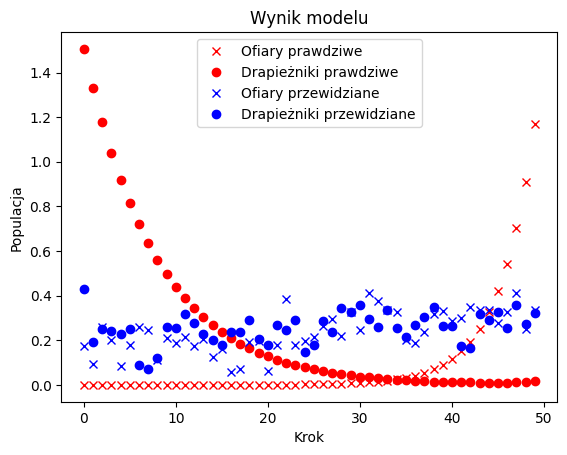

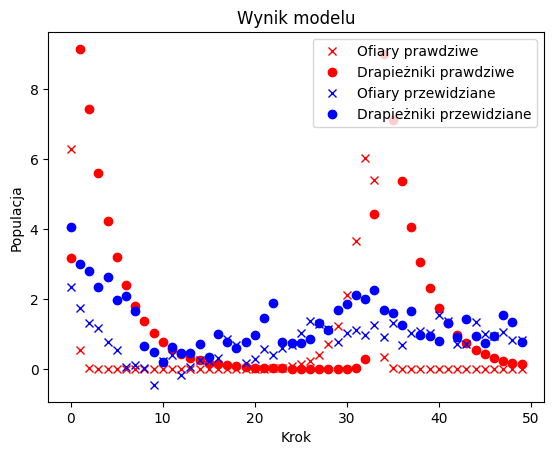

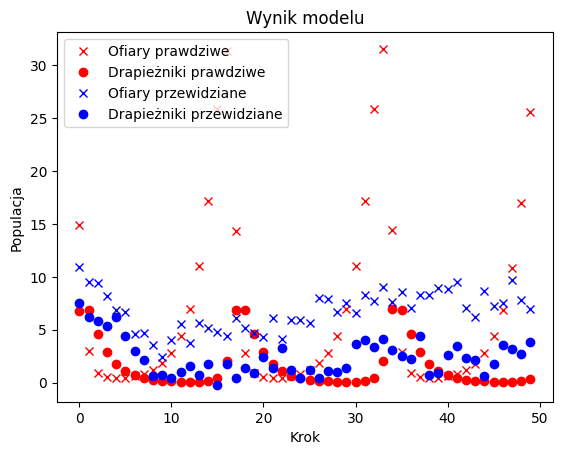

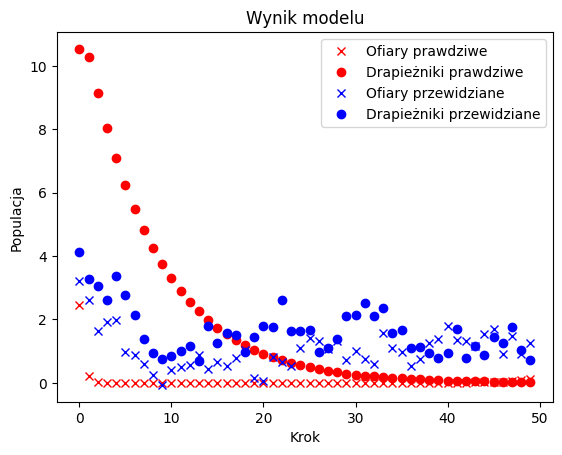

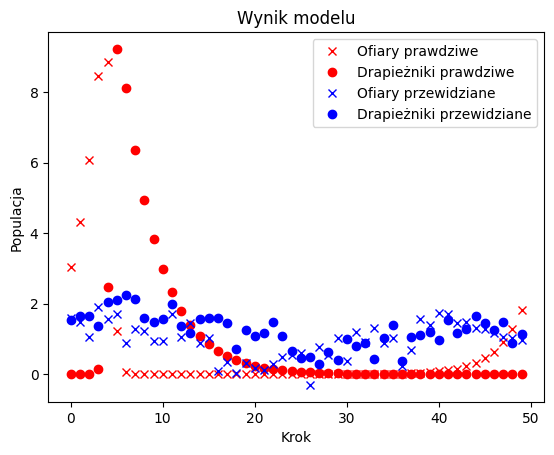

tensor(6.4693, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 3:
  batch 10 loss: 8.368459164380615
  batch 20 loss: 5.993640518040151
  batch 30 loss: 4.926629919856144
  batch 40 loss: 6.388119993105438
  batch 50 loss: 5.964711392455028
  batch 60 loss: 5.052838874489301
  batch 70 loss: 7.233133334225874
  batch 80 loss: 6.040781203808104
  batch 90 loss: 6.1322580224946
  batch 100 loss: 6.838658451321744
  batch 110 loss: 7.350064468607675
  batch 120 loss: 7.1030404906691045
  batch 130 loss: 5.905529150854663
  batch 140 loss: 7.649466952051583
  batch 150 loss: 5.738117005274891
  batch 160 loss: 5.506902177425805
  batch 170 loss: 6.410956230150218
  batch 180 loss: 6.8942683503782565
  batch 190 loss: 6.221956089741477
  batch 200 loss: 6.333178992923349


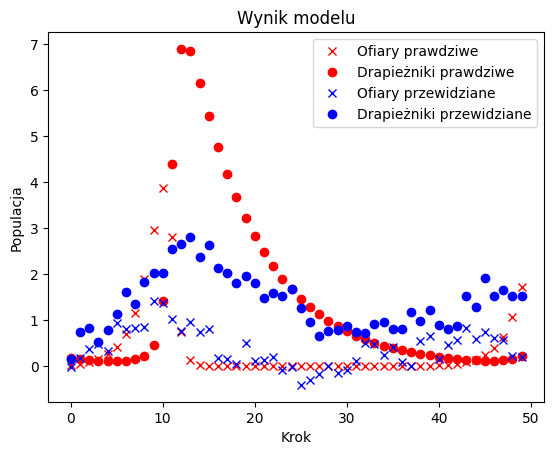

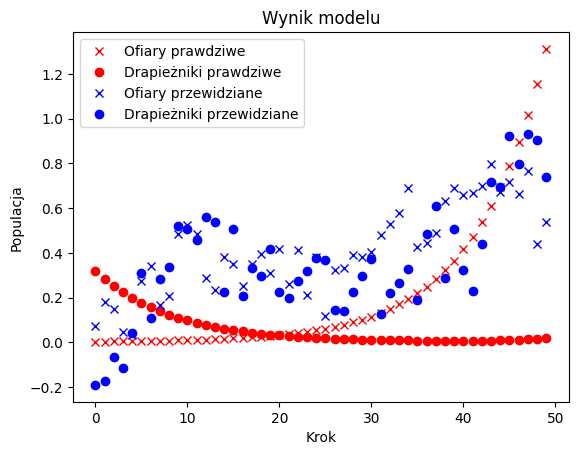

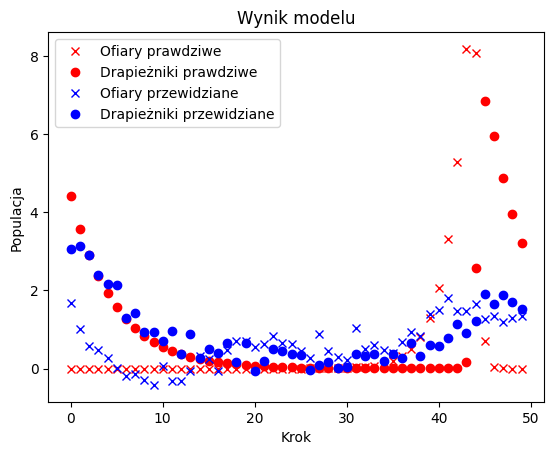

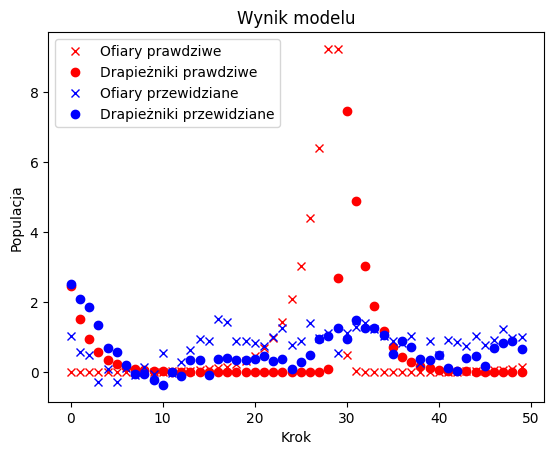

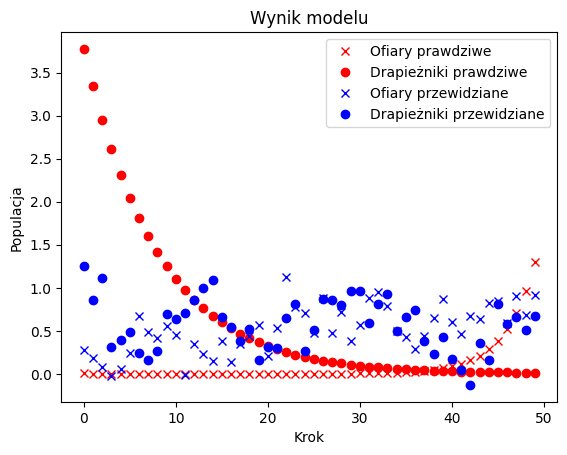

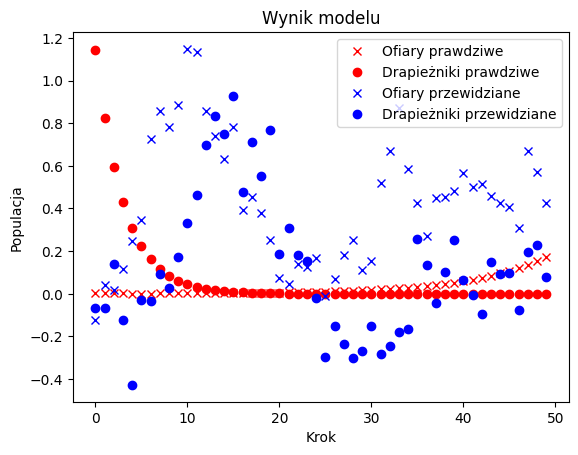

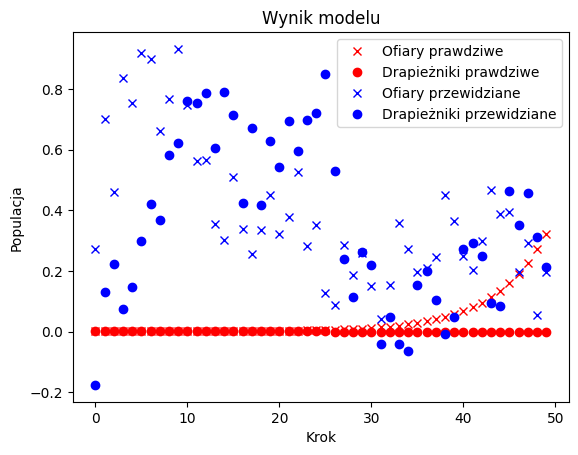

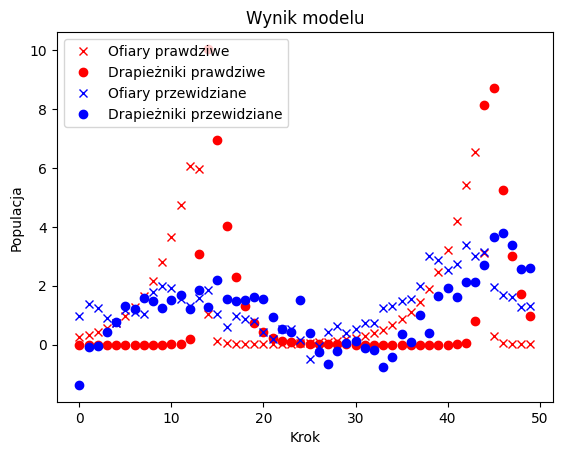

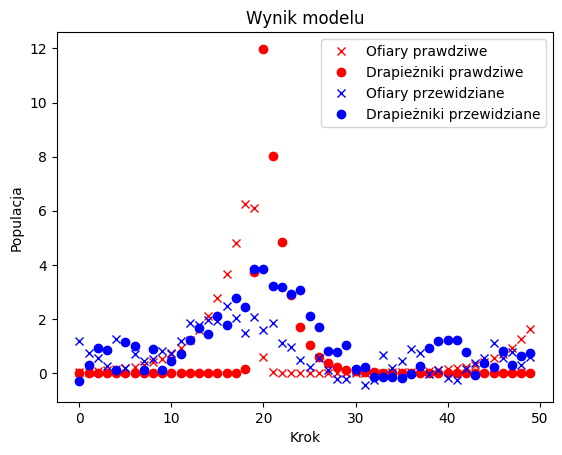

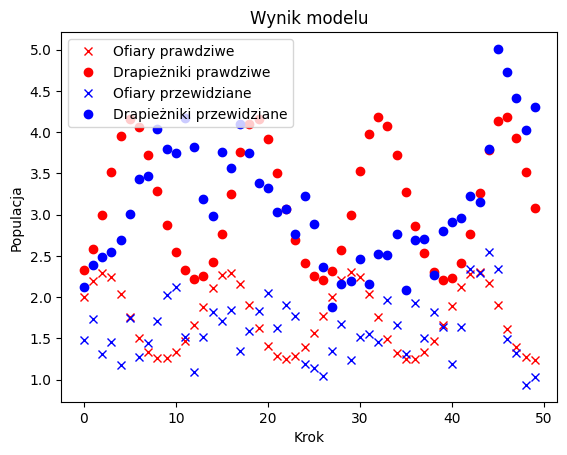

tensor(6.0175, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 4:
  batch 10 loss: 4.976770654995688
  batch 20 loss: 5.511616155268172
  batch 30 loss: 5.557324758872884
  batch 40 loss: 6.342723381342433
  batch 50 loss: 6.585708783727869
  batch 60 loss: 6.058549181112191
  batch 70 loss: 7.95417595322971
  batch 80 loss: 5.8356281362429065
  batch 90 loss: 5.546513533834373
  batch 100 loss: 5.192188292798433
  batch 110 loss: 4.619737980486611
  batch 120 loss: 3.7953017380579226
  batch 130 loss: 5.186764690184466
  batch 140 loss: 5.5596927518977415
  batch 150 loss: 5.835123929349258
  batch 160 loss: 5.461908121319109
  batch 170 loss: 6.440991397456523
  batch 180 loss: 5.613105741289005
  batch 190 loss: 5.661712852064977
  batch 200 loss: 5.121385901817287


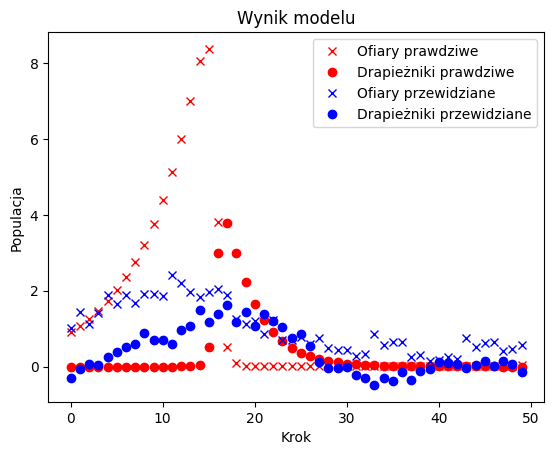

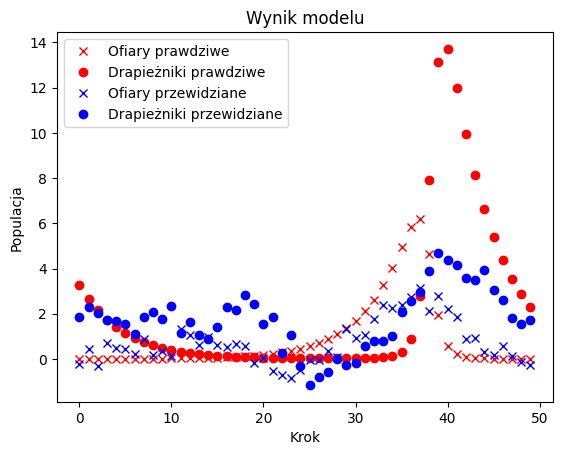

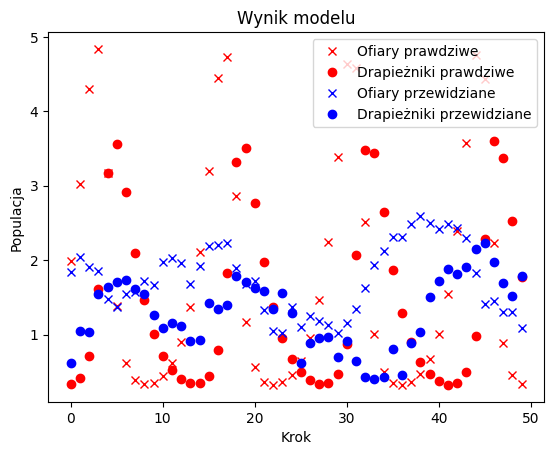

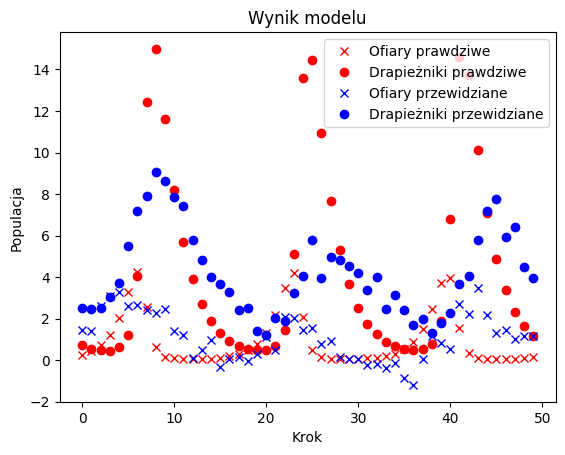

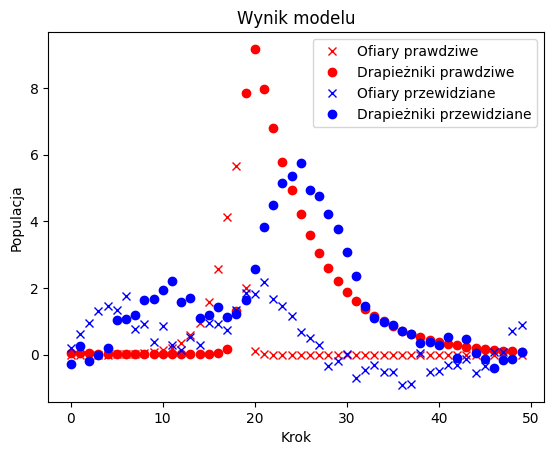

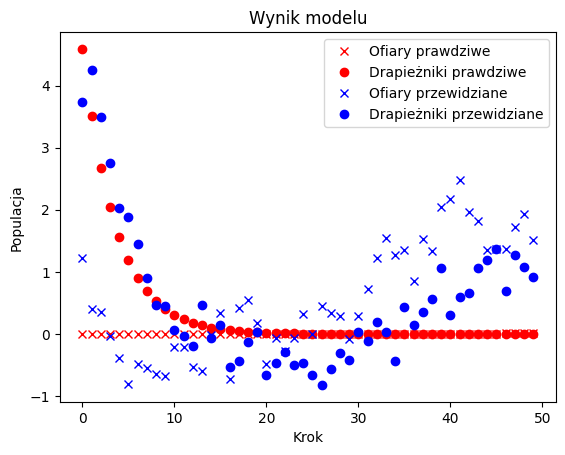

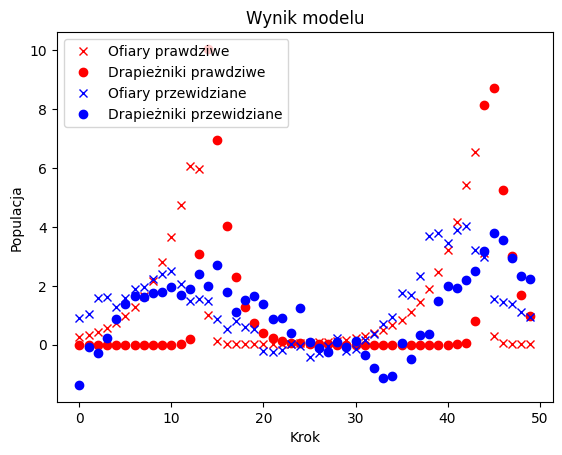

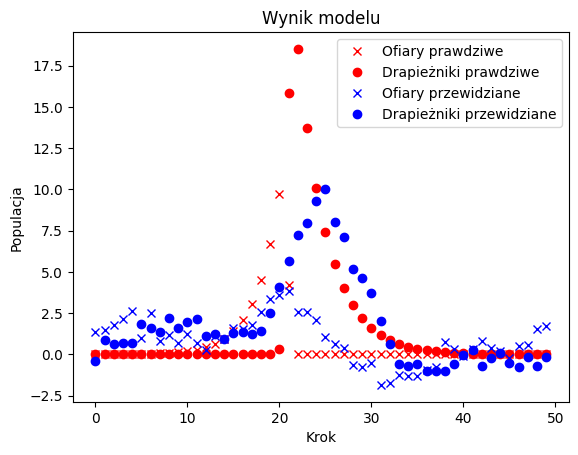

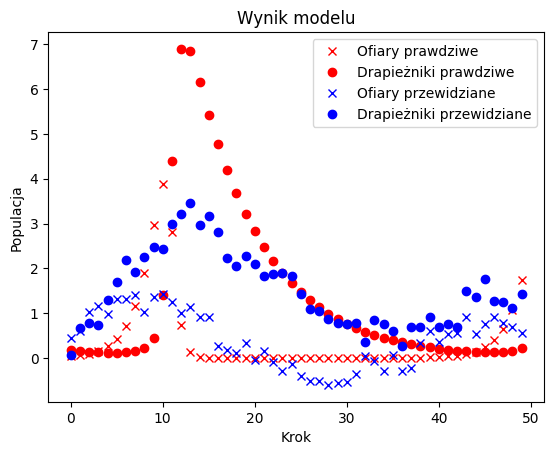

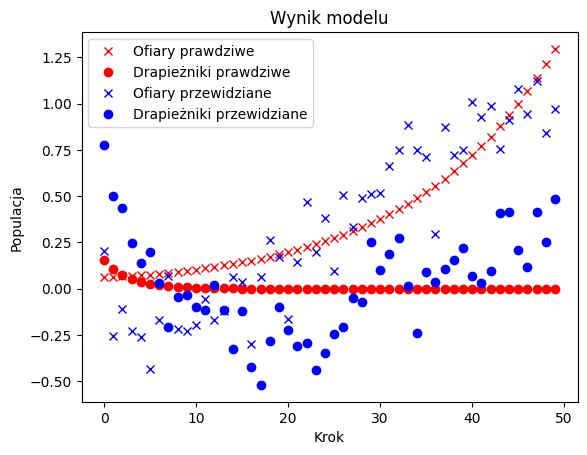

tensor(5.5309, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 5:
  batch 10 loss: 4.996180739021268
  batch 20 loss: 4.454894153516934
  batch 30 loss: 5.147108462945336
  batch 40 loss: 4.007822250095817
  batch 50 loss: 4.90254495209664
  batch 60 loss: 5.442532051425014
  batch 70 loss: 5.156934570979743
  batch 80 loss: 3.869094250972953
  batch 90 loss: 4.714301001857419
  batch 100 loss: 4.155793823012191
  batch 110 loss: 4.958676740201968
  batch 120 loss: 4.895784196825723
  batch 130 loss: 4.604002321033194
  batch 140 loss: 5.068900150818405
  batch 150 loss: 5.9787488891613165
  batch 160 loss: 5.291731951577667
  batch 170 loss: 5.557505971210805
  batch 180 loss: 5.777442456269324
  batch 190 loss: 5.164102689232935
  batch 200 loss: 5.0873020372828135


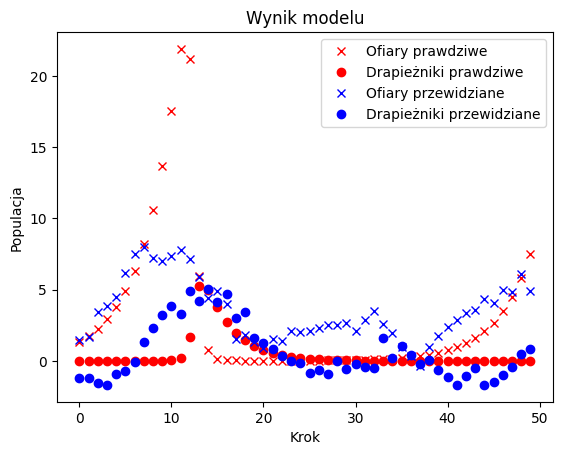

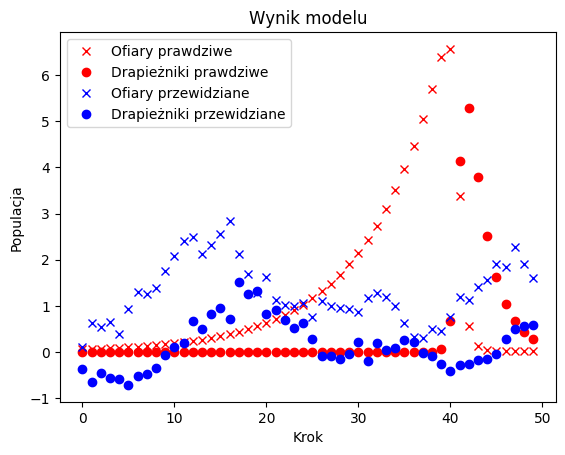

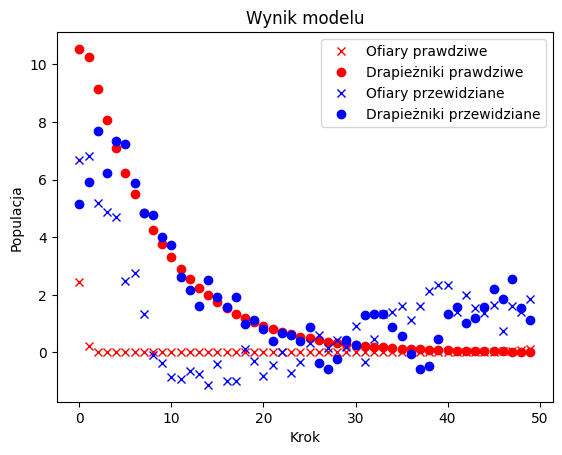

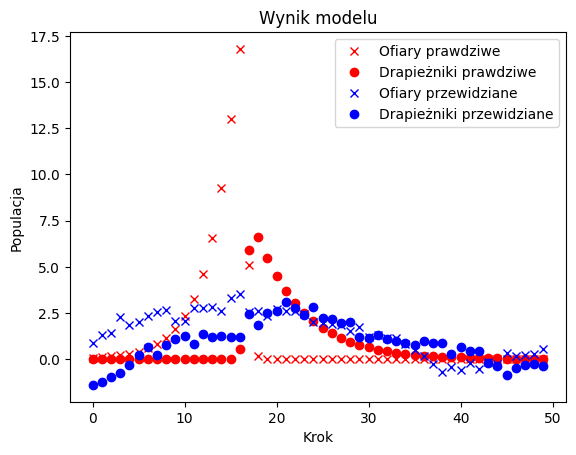

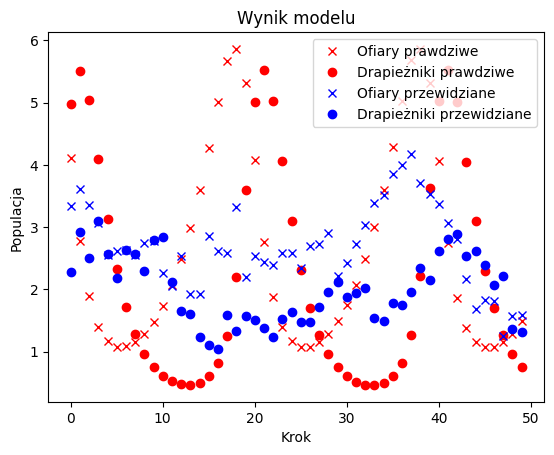

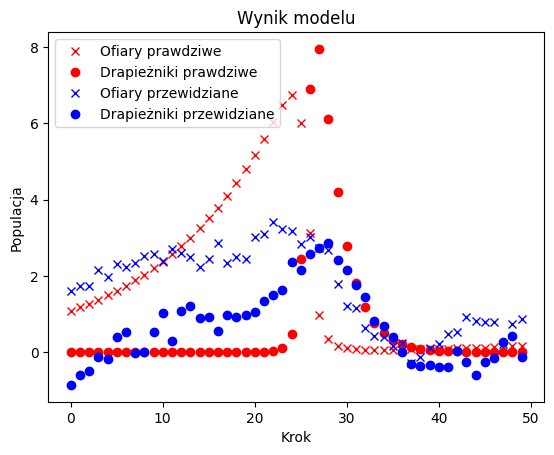

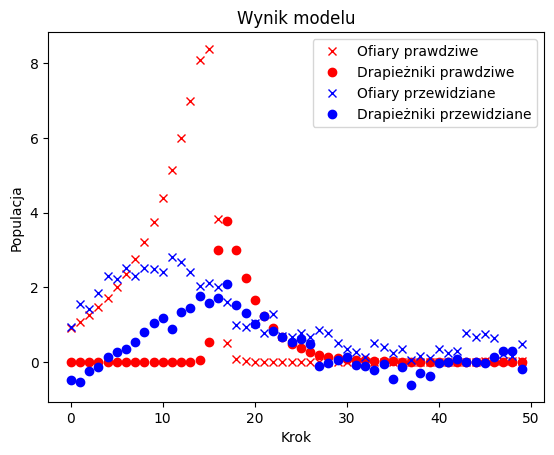

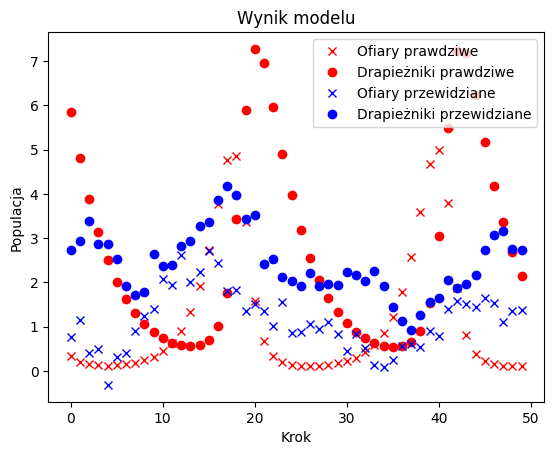

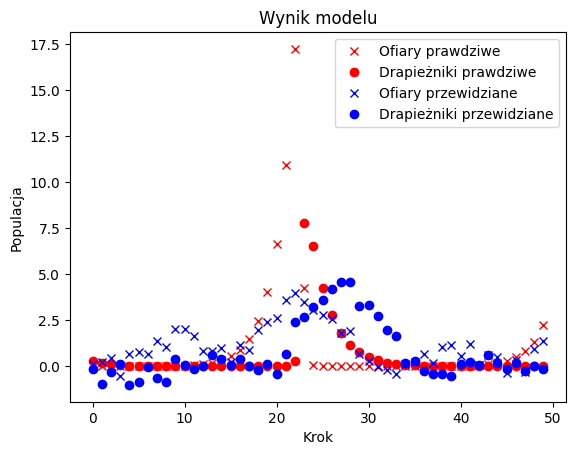

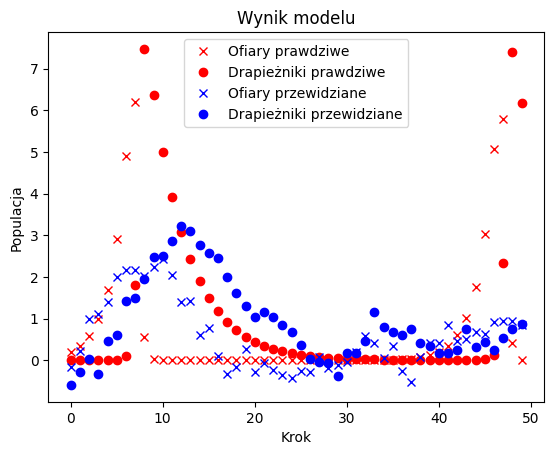

tensor(5.2039, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 6:
  batch 10 loss: 4.35883046829318
  batch 20 loss: 3.840231590956729
  batch 30 loss: 4.281198643880981
  batch 40 loss: 3.845615506289543
  batch 50 loss: 4.5537799482799555
  batch 60 loss: 4.939535118732837
  batch 70 loss: 5.293091635412578
  batch 80 loss: 4.8096690223019545
  batch 90 loss: 4.83878428435626
  batch 100 loss: 4.008092334261064
  batch 110 loss: 4.283408804252899
  batch 120 loss: 3.3533307843177647
  batch 130 loss: 3.4993088805248718
  batch 140 loss: 4.212372198907399
  batch 150 loss: 3.3310806587162873
  batch 160 loss: 5.088164658058655
  batch 170 loss: 5.509927958507378
  batch 180 loss: 5.452248793174767
  batch 190 loss: 4.136084886760058
  batch 200 loss: 5.352737509854672


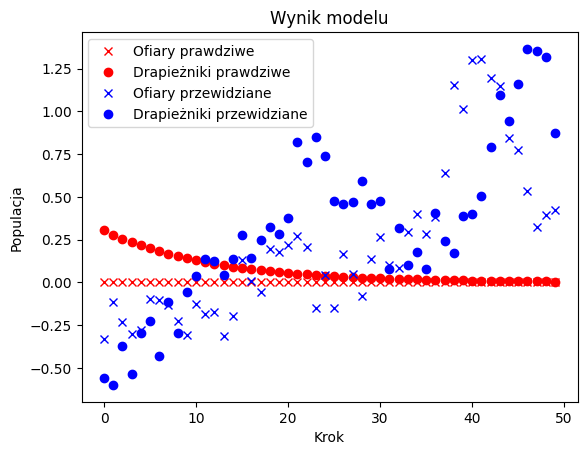

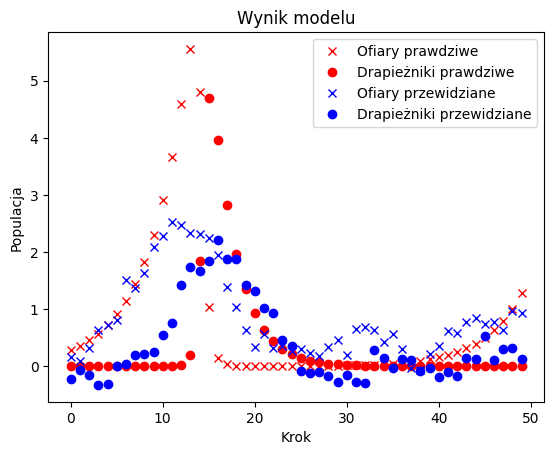

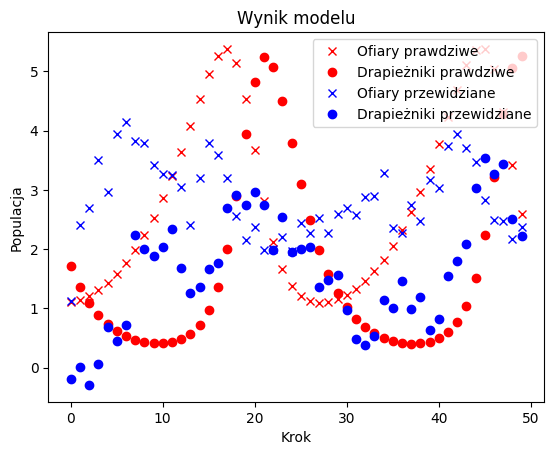

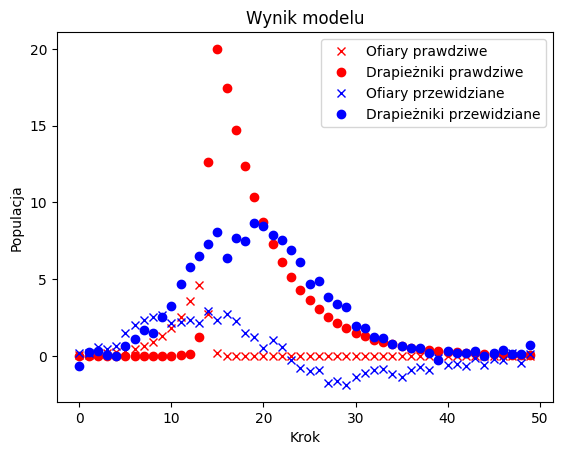

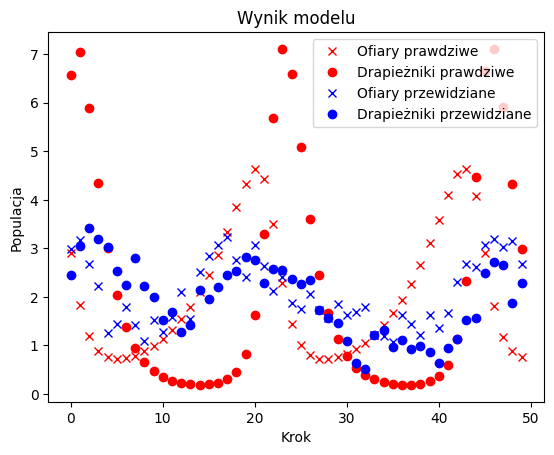

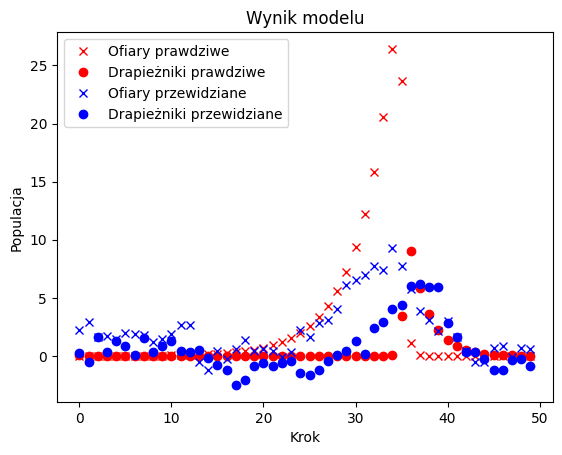

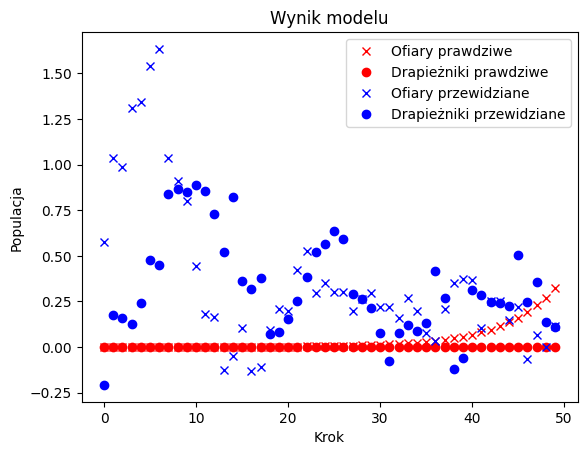

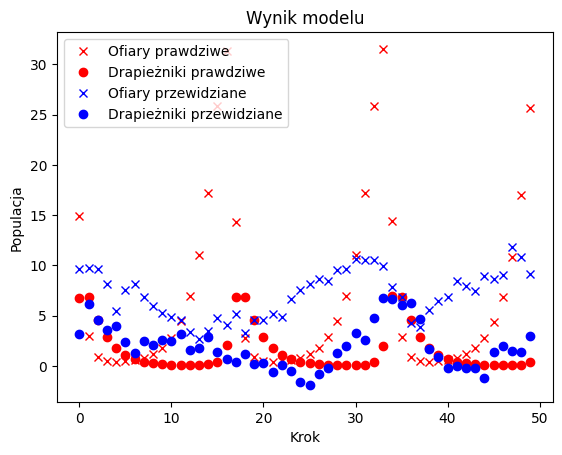

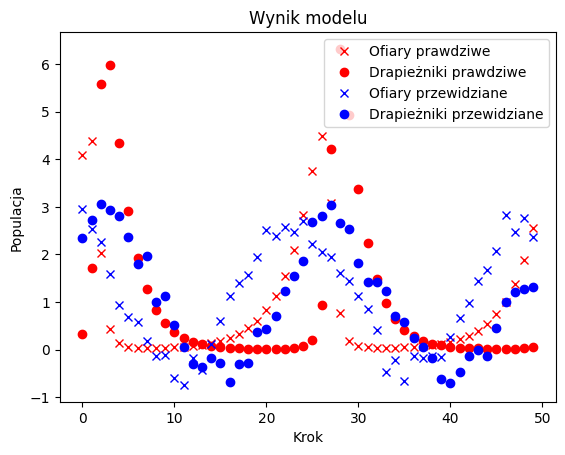

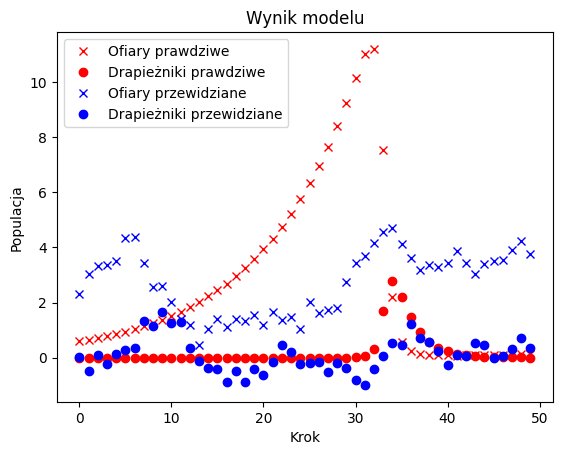

tensor(4.7935, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 7:
  batch 10 loss: 4.649970450330889
  batch 20 loss: 3.6112638065396525
  batch 30 loss: 3.504191352157735
  batch 40 loss: 3.878905278486708
  batch 50 loss: 4.296460248689254
  batch 60 loss: 3.0823254382429766
  batch 70 loss: 4.239892091694353
  batch 80 loss: 4.469454077915543
  batch 90 loss: 4.346500819295507
  batch 100 loss: 4.501933345654116
  batch 110 loss: 4.023071318027794
  batch 120 loss: 3.89189405697273
  batch 130 loss: 3.7954818474594867
  batch 140 loss: 4.601697815179573
  batch 150 loss: 3.1655675904846357
  batch 160 loss: 3.7628886196275495
  batch 170 loss: 3.7898162844403402
  batch 180 loss: 4.222805451103934
  batch 190 loss: 4.326420781779601
  batch 200 loss: 4.666390901005455


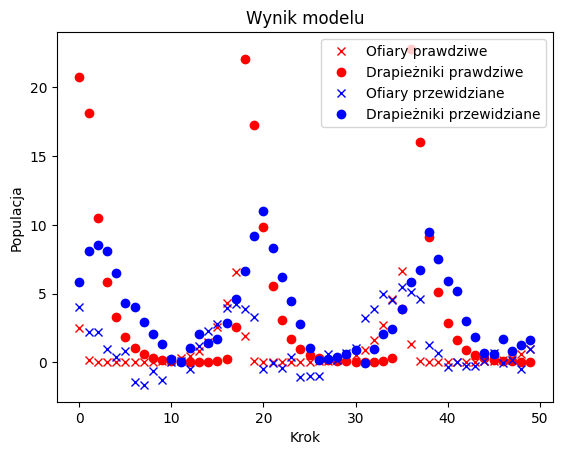

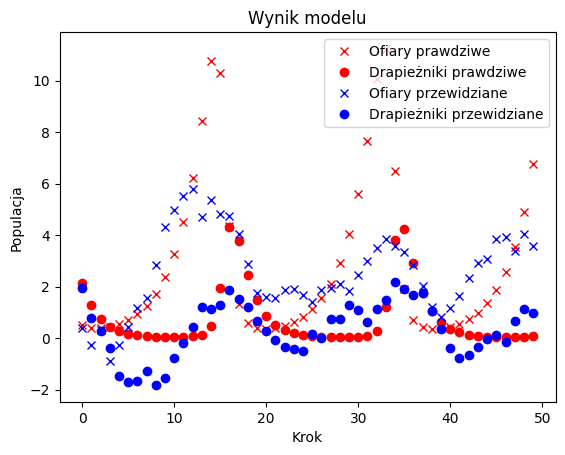

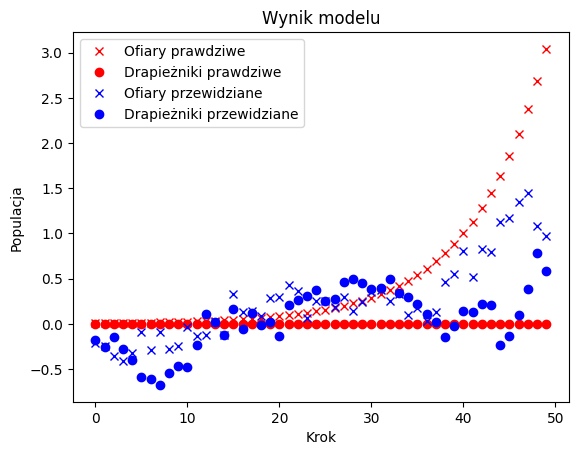

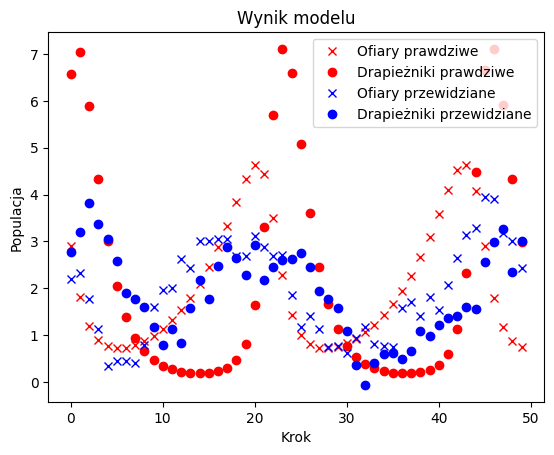

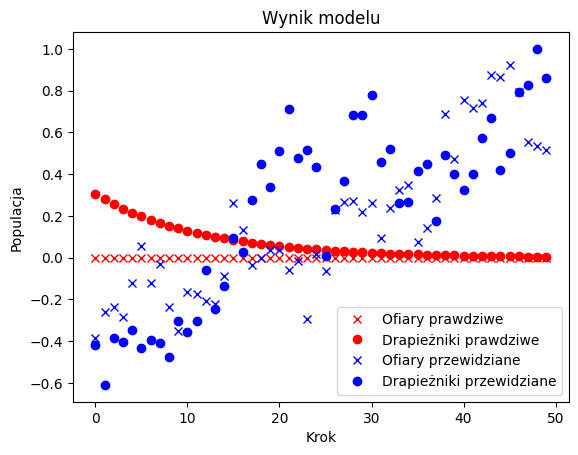

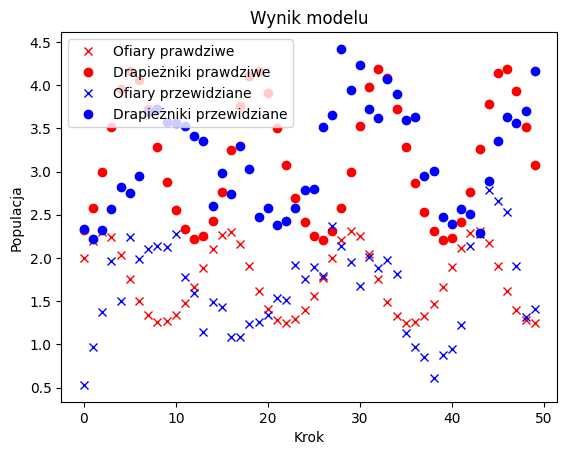

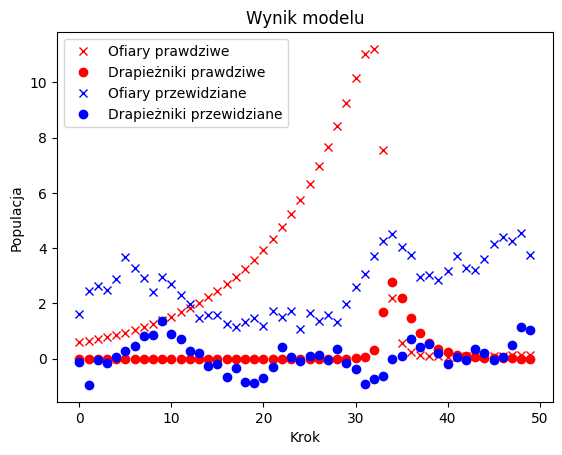

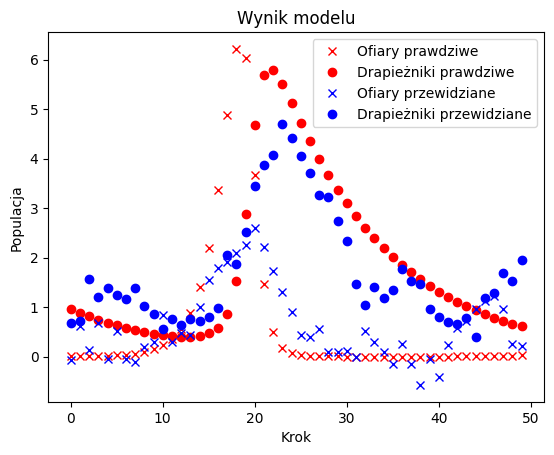

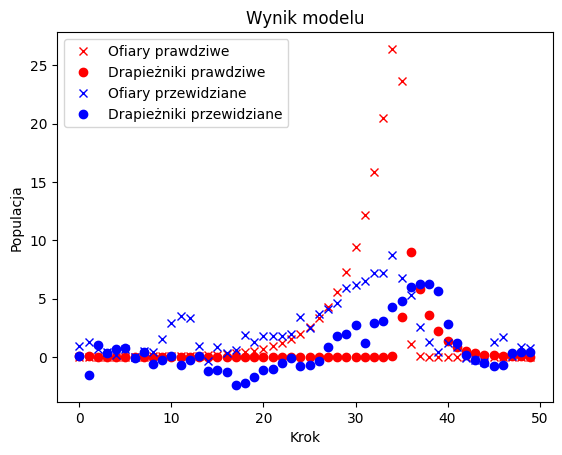

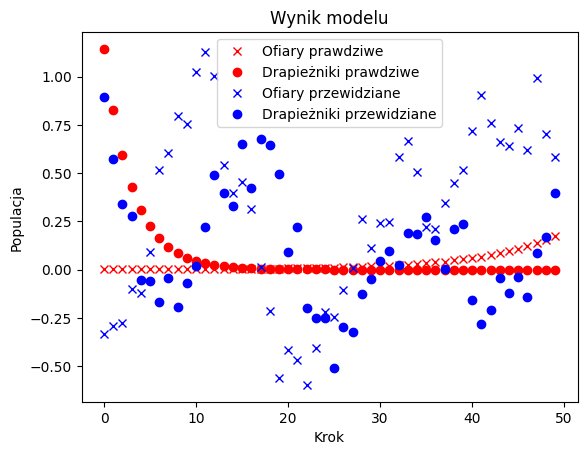

tensor(4.5872, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 8:
  batch 10 loss: 3.795074124222892
  batch 20 loss: 4.044752259017044
  batch 30 loss: 4.239993251424247
  batch 40 loss: 4.146463744022081
  batch 50 loss: 3.4272201723169795
  batch 60 loss: 3.9065144698836916
  batch 70 loss: 3.992816274227599
  batch 80 loss: 3.6229815414574675
  batch 90 loss: 3.387787901451322
  batch 100 loss: 3.7050300922564956
  batch 110 loss: 4.214724048504431
  batch 120 loss: 3.3413513016513816
  batch 130 loss: 2.9365713949180288
  batch 140 loss: 3.318696455827704
  batch 150 loss: 4.260575298234759
  batch 160 loss: 2.7954835849127715
  batch 170 loss: 4.2772002255934565
  batch 180 loss: 3.185426139585654
  batch 190 loss: 4.016878626609288
  batch 200 loss: 3.7203965321889063


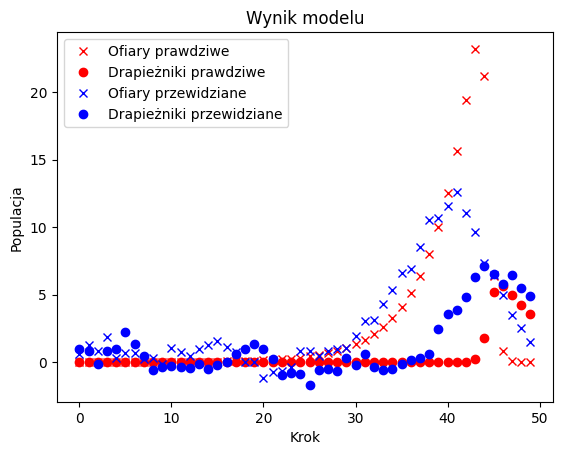

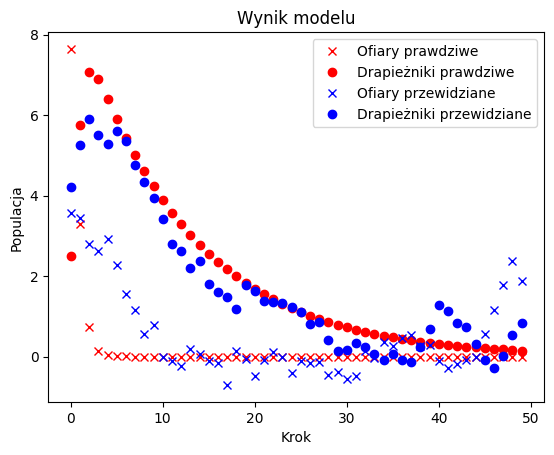

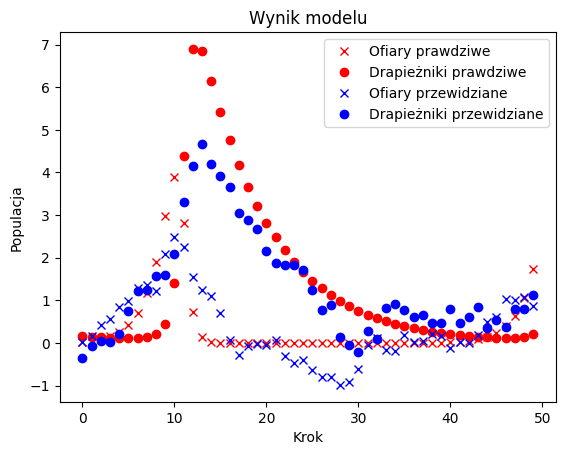

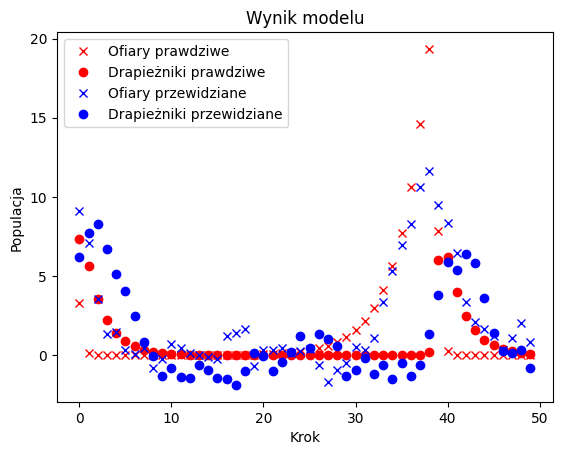

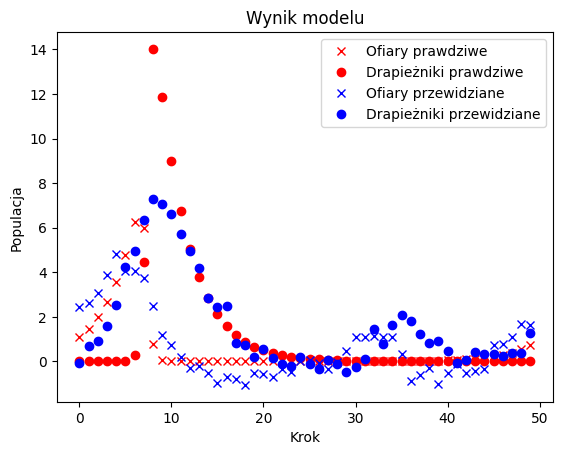

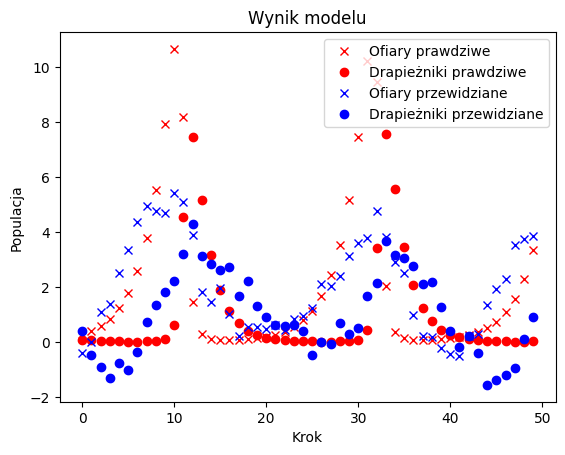

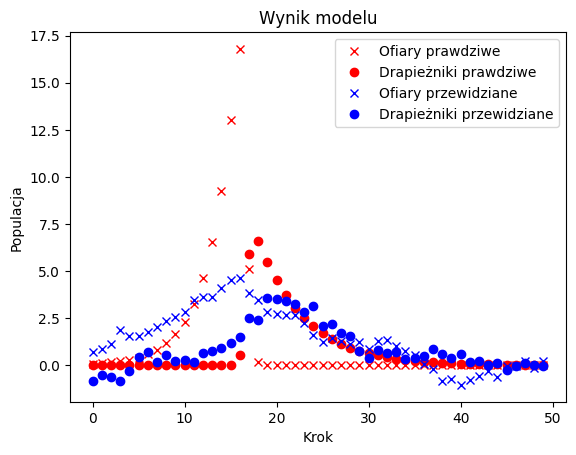

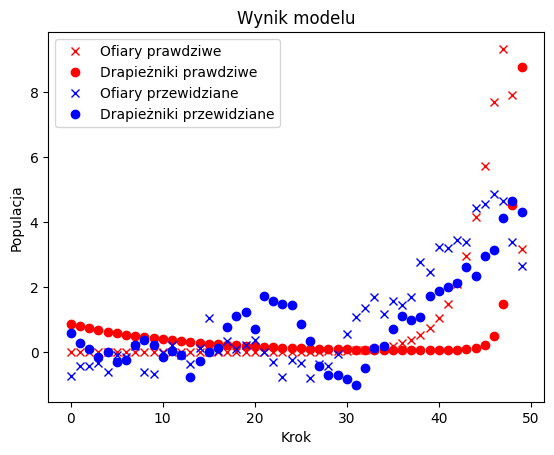

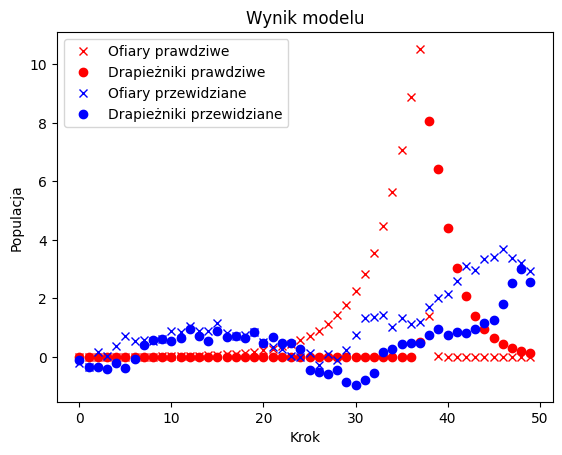

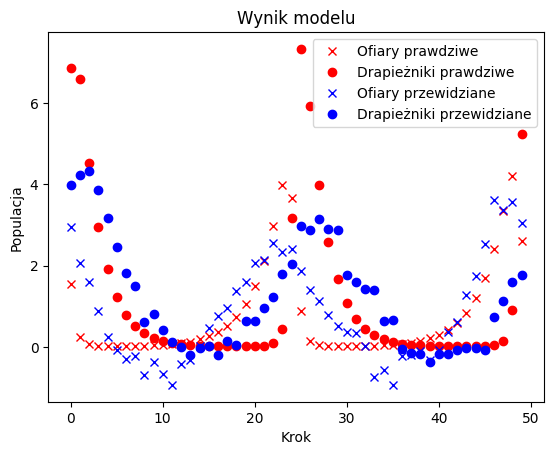

tensor(4.2597, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 9:
  batch 10 loss: 2.8402325301067464
  batch 20 loss: 3.1628590711172135
  batch 30 loss: 4.8550862941844
  batch 40 loss: 3.600174874280352
  batch 50 loss: 2.900246779712992
  batch 60 loss: 3.3473762006028567
  batch 70 loss: 3.3163241081389776
  batch 80 loss: 2.7970242623622057
  batch 90 loss: 3.365924232012837
  batch 100 loss: 3.5723506341773623
  batch 110 loss: 3.776743468212716
  batch 120 loss: 3.144099556515371
  batch 130 loss: 3.6287303317616297
  batch 140 loss: 3.181409715961013
  batch 150 loss: 3.2026949569455843
  batch 160 loss: 3.7747906956998896
  batch 170 loss: 3.080306489696506
  batch 180 loss: 3.349809351454178
  batch 190 loss: 3.4228350442894504
  batch 200 loss: 3.727911518225703


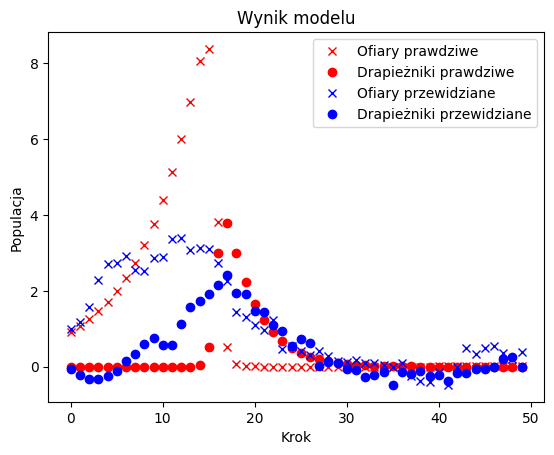

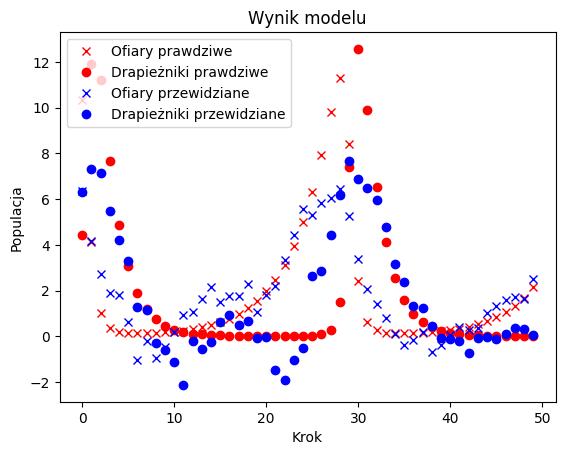

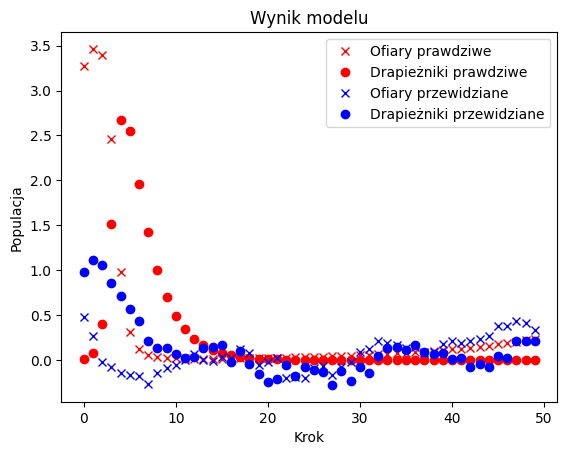

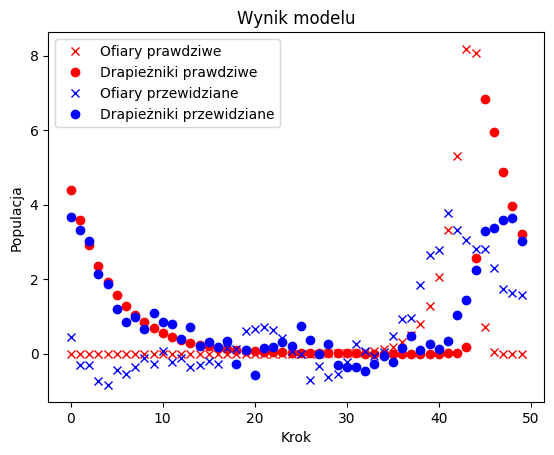

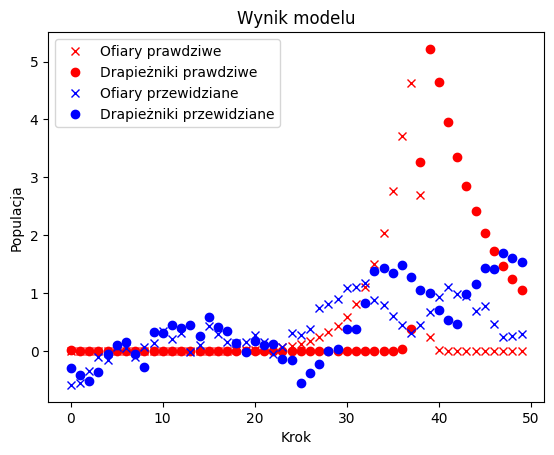

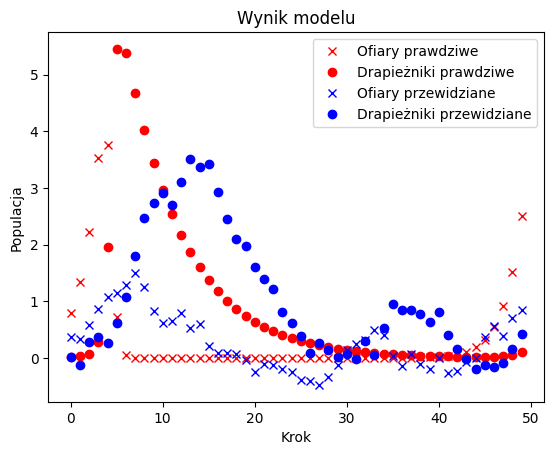

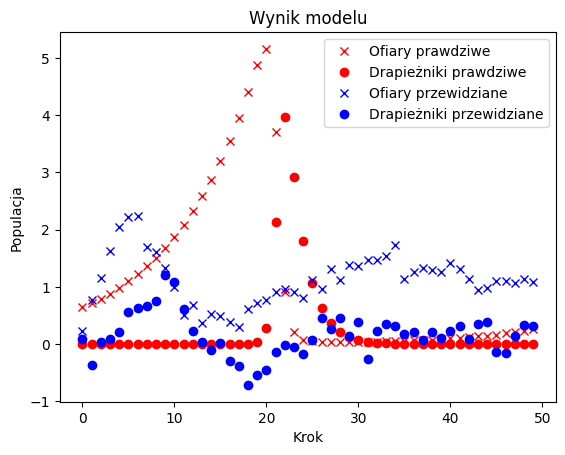

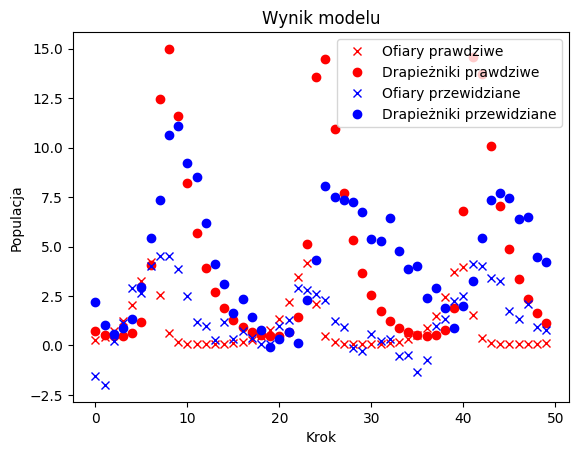

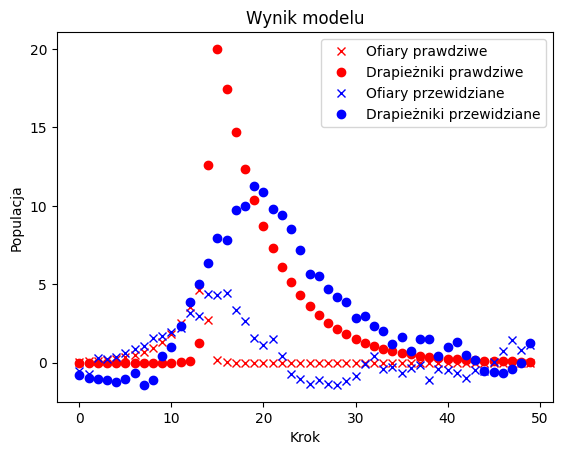

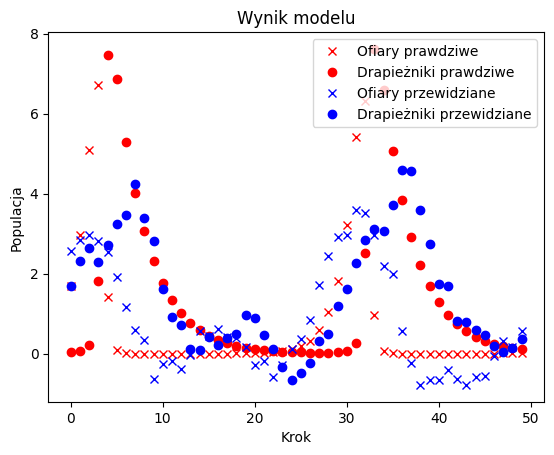

tensor(4.1288, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 10:
  batch 10 loss: 2.8867141818392947
  batch 20 loss: 3.2141623408185374
  batch 30 loss: 2.5904467979077808
  batch 40 loss: 3.1903452199759887
  batch 50 loss: 2.973313488946268
  batch 60 loss: 3.7797541512787745
  batch 70 loss: 3.3781199061036853
  batch 80 loss: 2.837391847534889
  batch 90 loss: 3.5300804050065357
  batch 100 loss: 3.427250336074704
  batch 110 loss: 2.9825022963353516
  batch 120 loss: 3.176039335360188
  batch 130 loss: 2.4466115912590922
  batch 140 loss: 3.4739001105818637
  batch 150 loss: 2.9189610908025956
  batch 160 loss: 2.9160799186596216
  batch 170 loss: 3.749286130370075
  batch 180 loss: 3.397449173873371
  batch 190 loss: 3.6694000949939913
  batch 200 loss: 3.007791619337671


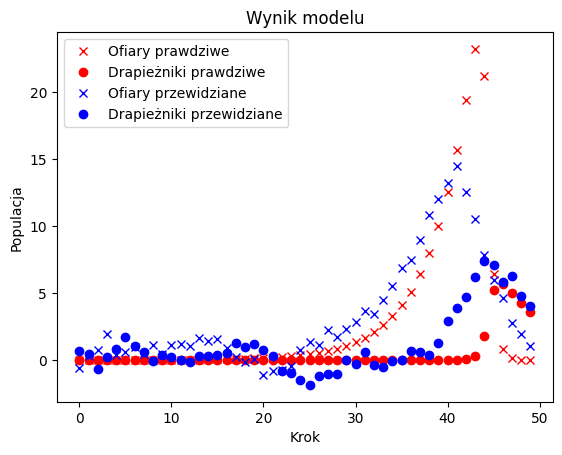

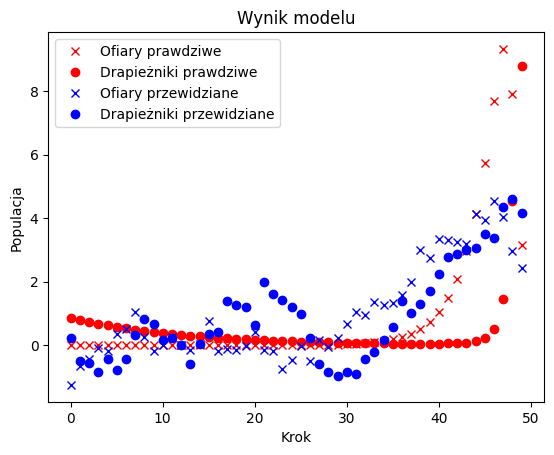

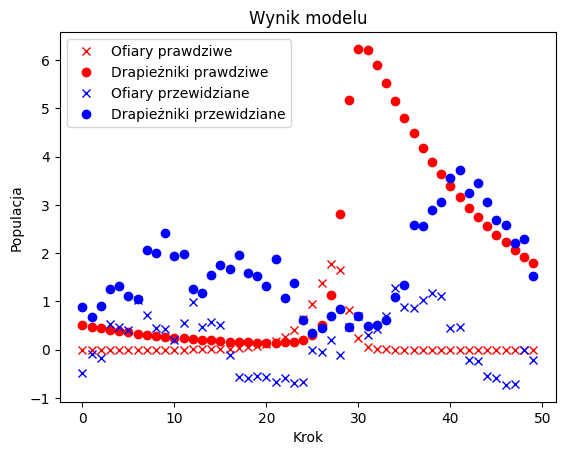

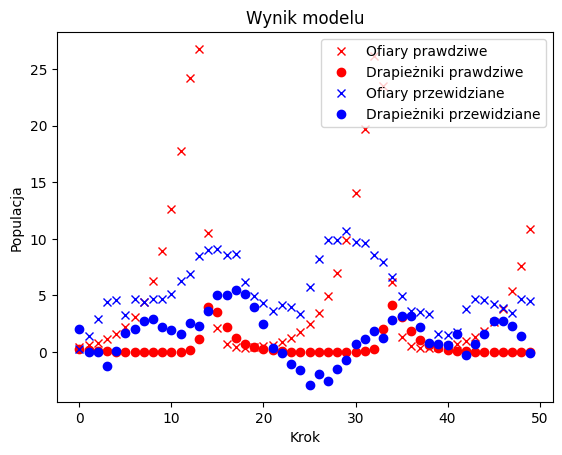

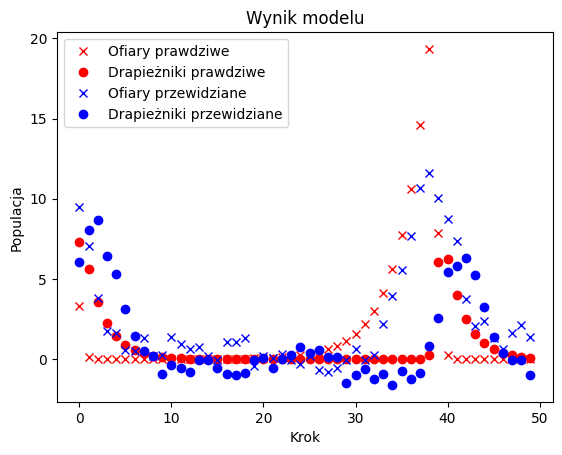

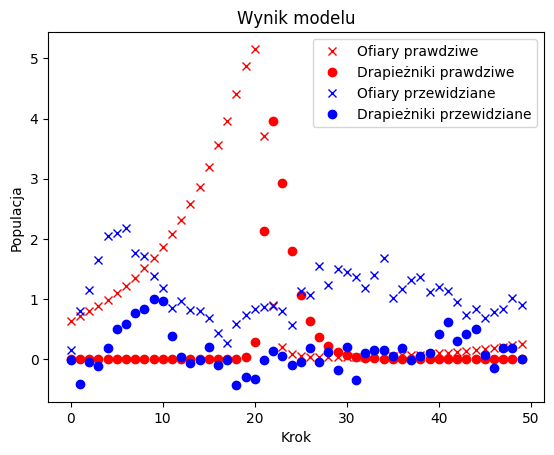

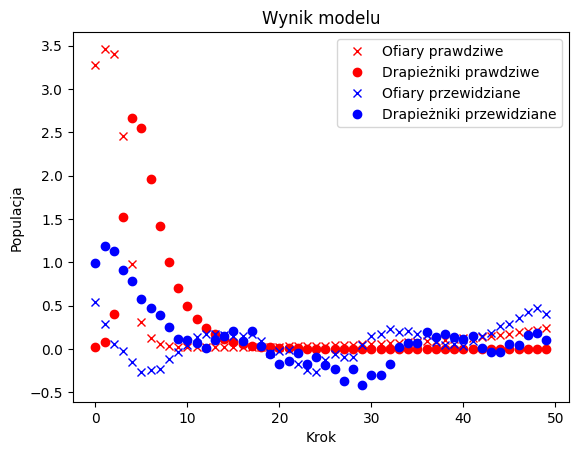

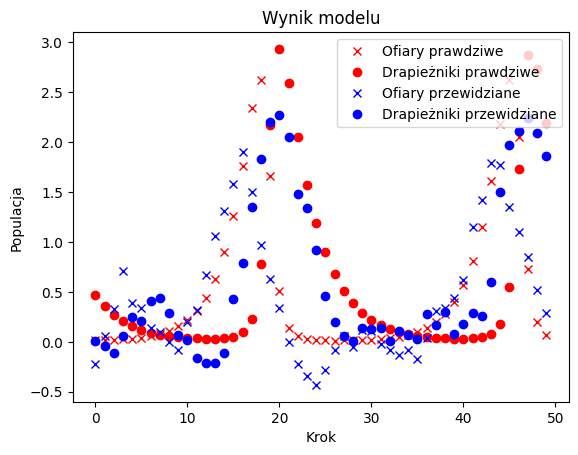

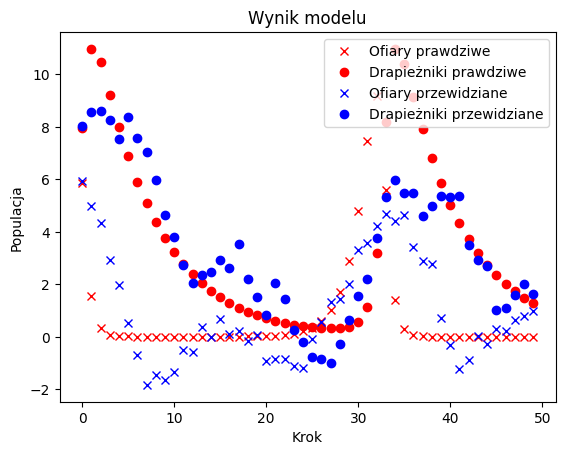

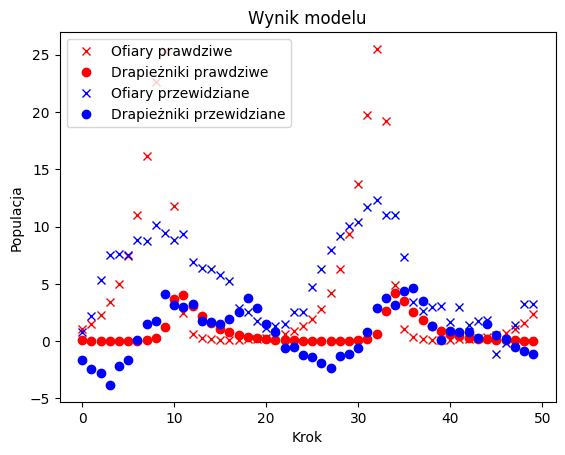

tensor(4.0981, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 11:
  batch 10 loss: 2.7412796099835983
  batch 20 loss: 2.7657908916826193
  batch 30 loss: 2.697567033206501
  batch 40 loss: 2.8886751033504683
  batch 50 loss: 3.1841103499269154
  batch 60 loss: 2.5607623737538137
  batch 70 loss: 2.749110606828618
  batch 80 loss: 3.14690413016839
  batch 90 loss: 2.5429480346816082
  batch 100 loss: 3.0264882358459184
  batch 110 loss: 2.752939663483212
  batch 120 loss: 3.7178393307333883
  batch 130 loss: 2.861580062530549
  batch 140 loss: 2.586562541828843
  batch 150 loss: 3.524322236578336
  batch 160 loss: 3.3615094810819244
  batch 170 loss: 2.8522935824261735
  batch 180 loss: 3.481228063803427
  batch 190 loss: 3.3745510715394795
  batch 200 loss: 2.6760403139917788


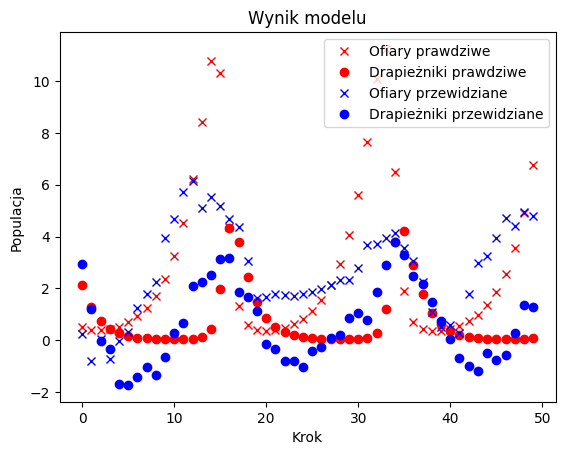

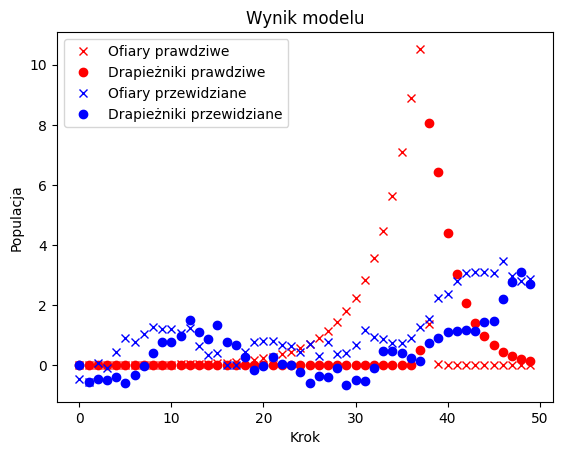

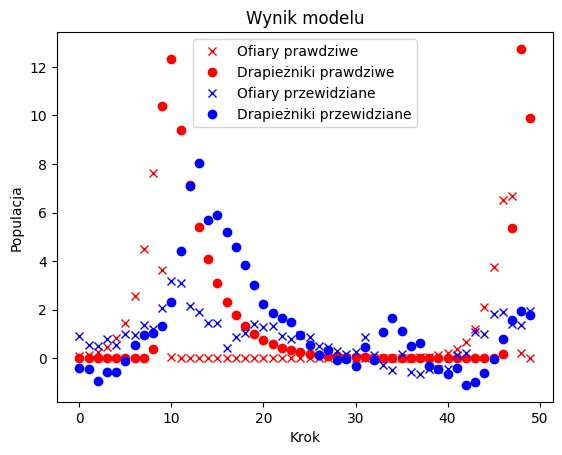

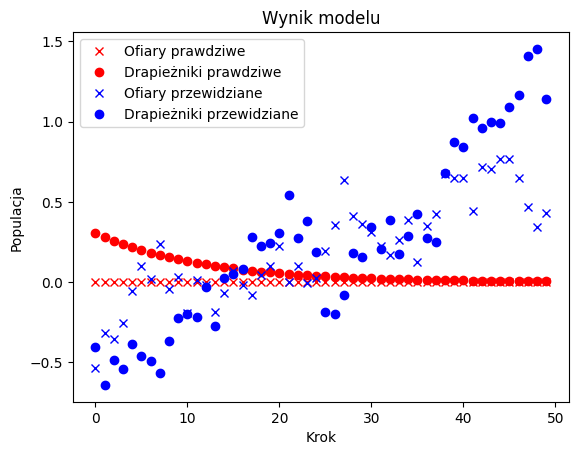

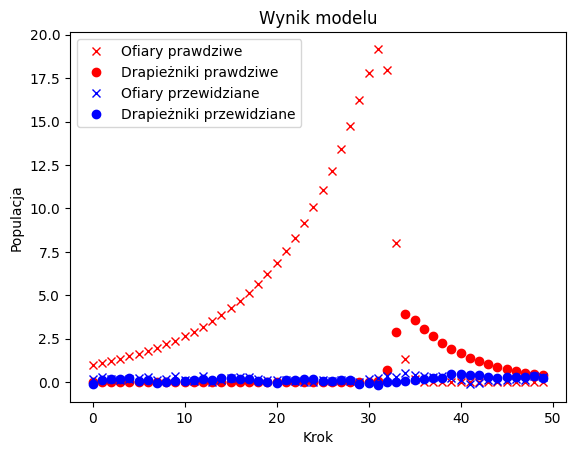

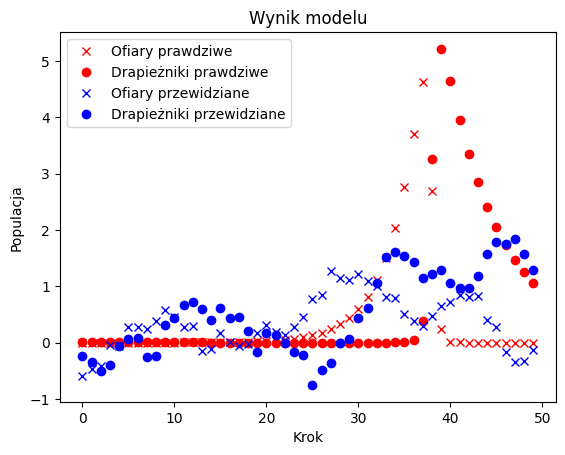

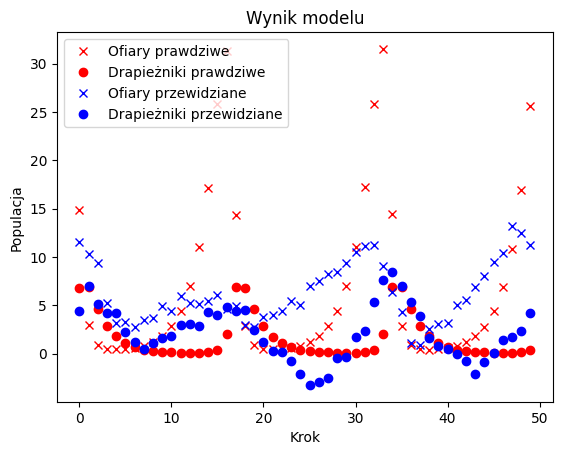

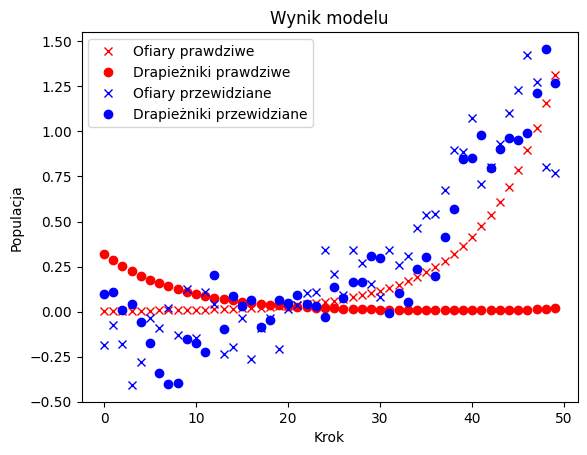

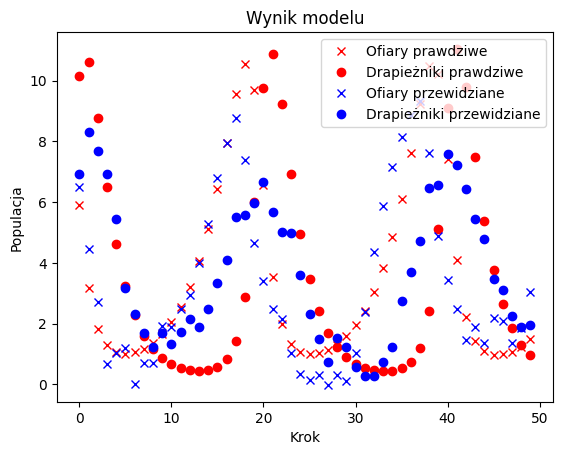

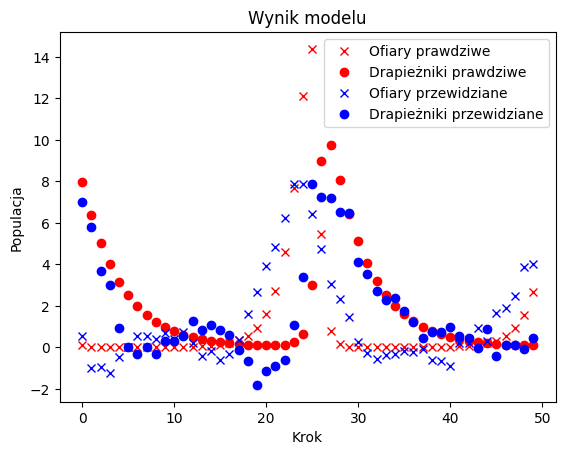

tensor(3.9035, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 12:
  batch 10 loss: 2.5633757226540195
  batch 20 loss: 3.2913704786411033
  batch 30 loss: 2.7393973127853815
  batch 40 loss: 2.7375411643913177
  batch 50 loss: 2.537034398457202
  batch 60 loss: 2.485044975821096
  batch 70 loss: 2.6535245831939727
  batch 80 loss: 2.9955026036124988
  batch 90 loss: 2.7784666137680993
  batch 100 loss: 3.2956331050765284
  batch 110 loss: 3.248020232816523
  batch 120 loss: 3.198788716021027
  batch 130 loss: 2.659296006108936
  batch 140 loss: 2.6236873630341258
  batch 150 loss: 3.356580746800327
  batch 160 loss: 2.9476614683887314
  batch 170 loss: 2.6777459678786224
  batch 180 loss: 2.2125212105864414
  batch 190 loss: 2.276201542638777
  batch 200 loss: 2.7882271507595124


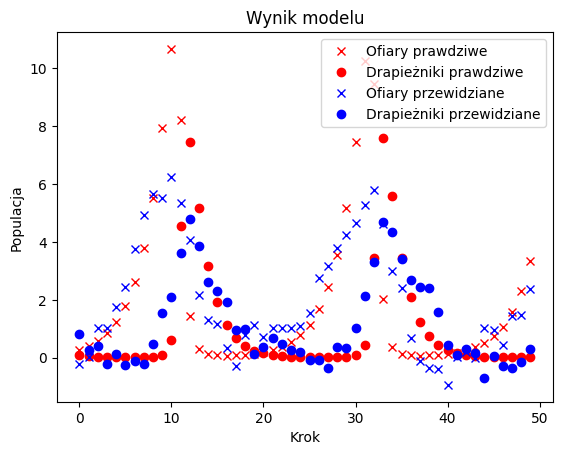

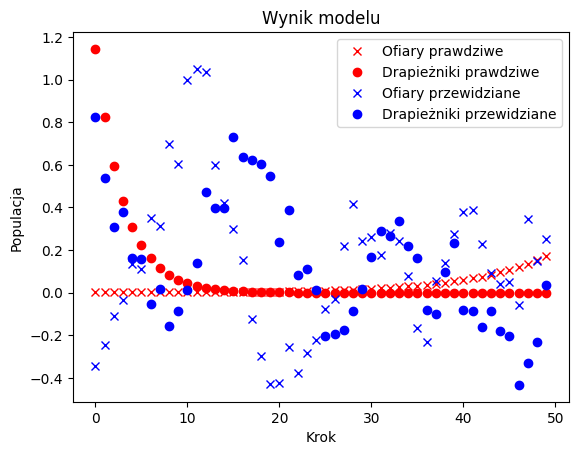

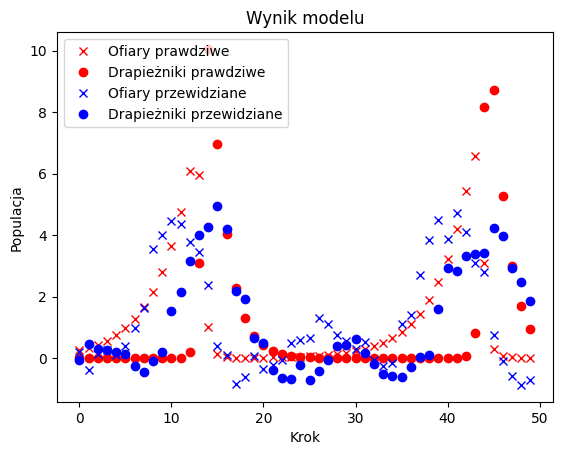

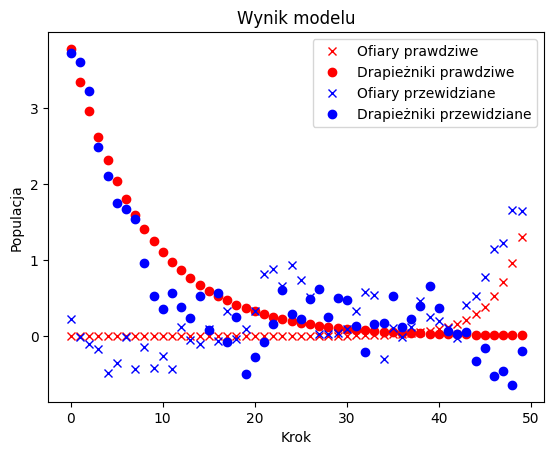

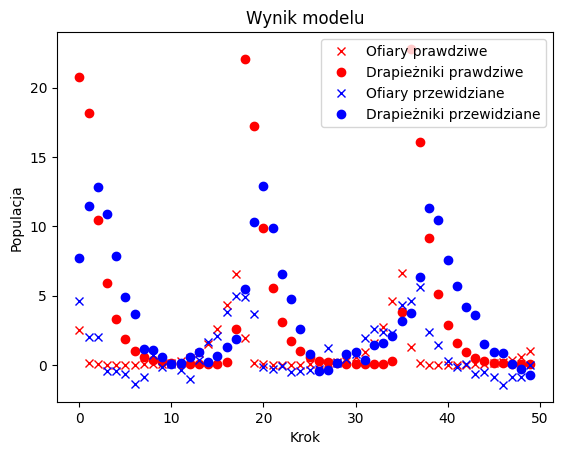

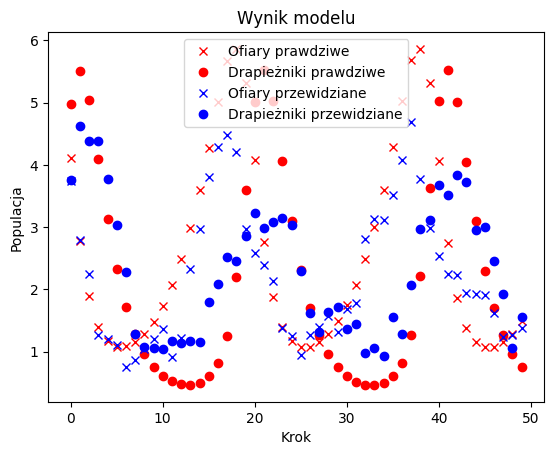

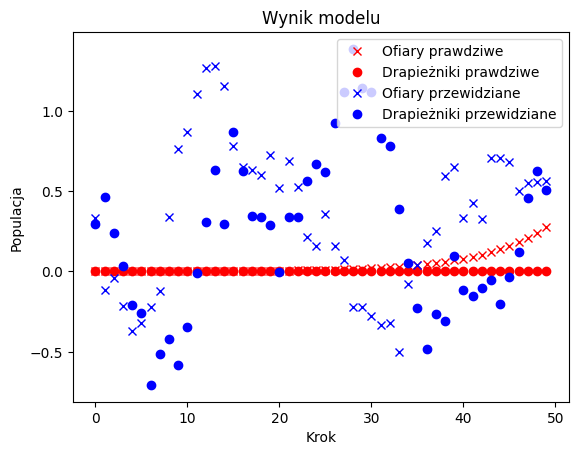

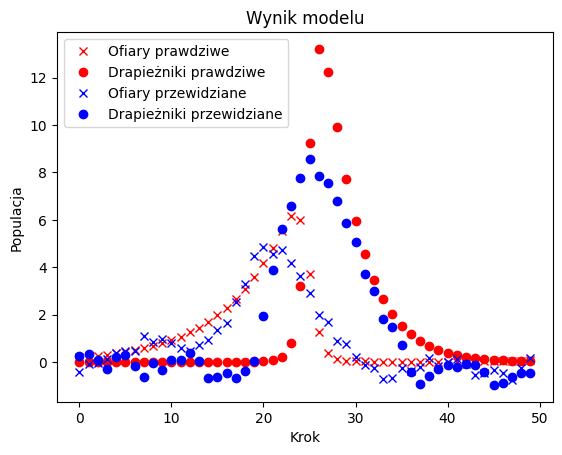

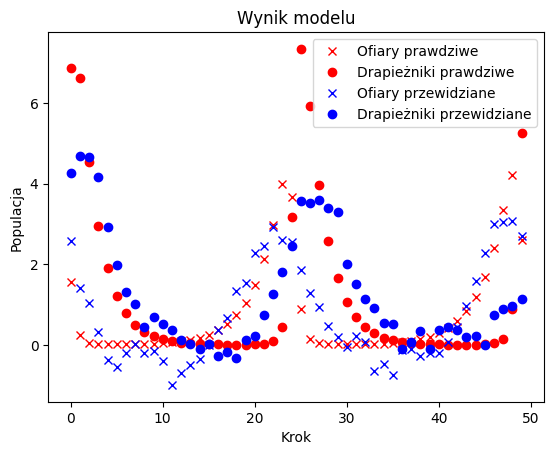

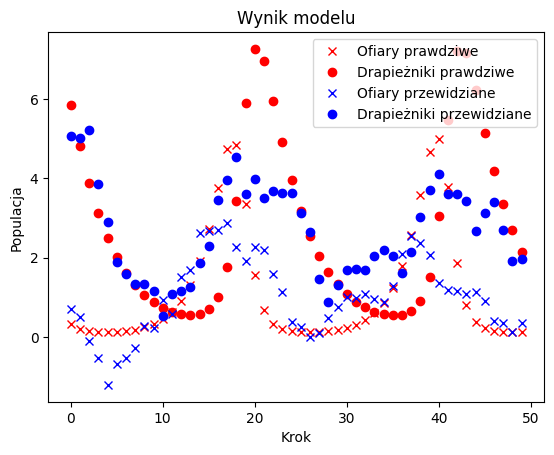

tensor(3.8242, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 13:
  batch 10 loss: 2.321935930944389
  batch 20 loss: 1.8289682715922613
  batch 30 loss: 3.260618775013969
  batch 40 loss: 2.4290547840481915
  batch 50 loss: 3.444324193127907
  batch 60 loss: 2.2765851367365135
  batch 70 loss: 3.0524497051011403
  batch 80 loss: 2.0649005826359597
  batch 90 loss: 2.467013500651747
  batch 100 loss: 2.434995073612484
  batch 110 loss: 2.7852377800824053
  batch 120 loss: 2.0071582212185595
  batch 130 loss: 2.049911468201876
  batch 140 loss: 2.684396294556457
  batch 150 loss: 2.9715478903833947
  batch 160 loss: 2.5590421298276165
  batch 170 loss: 2.897785903595979
  batch 180 loss: 2.9863025279452913
  batch 190 loss: 2.698795546037712
  batch 200 loss: 3.0166894319440702


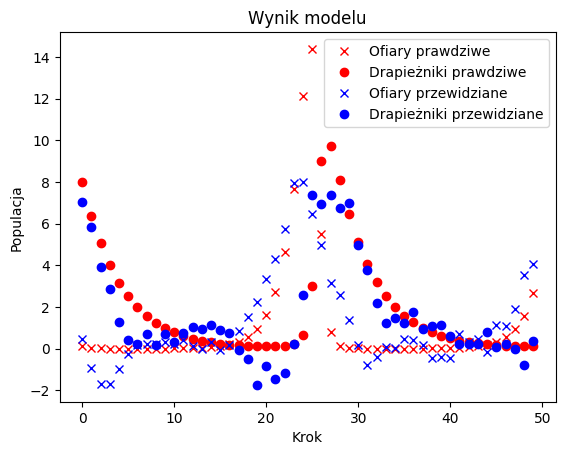

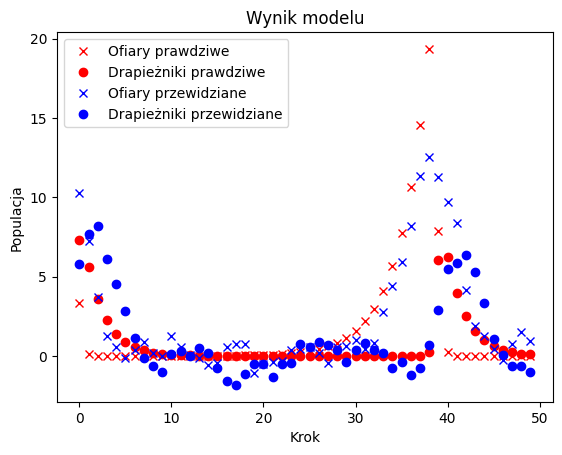

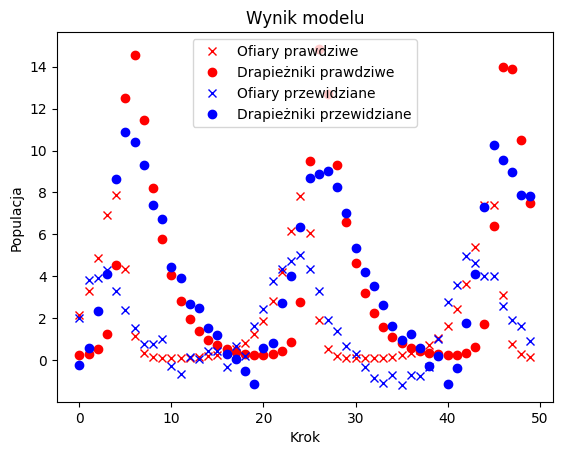

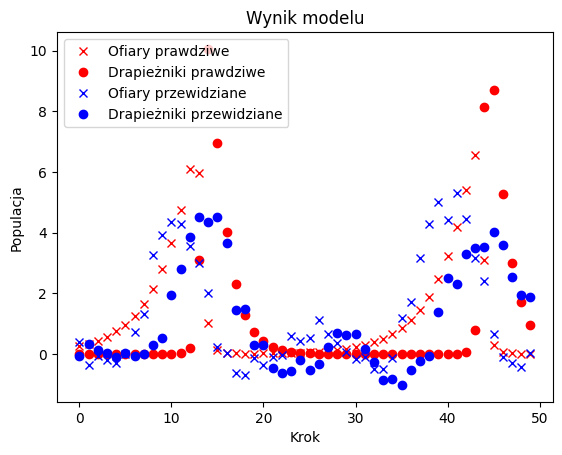

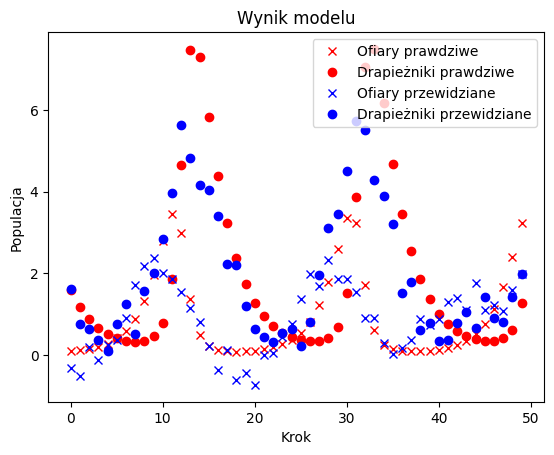

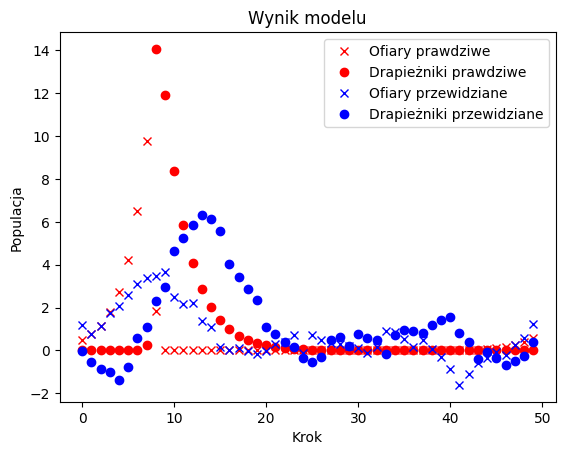

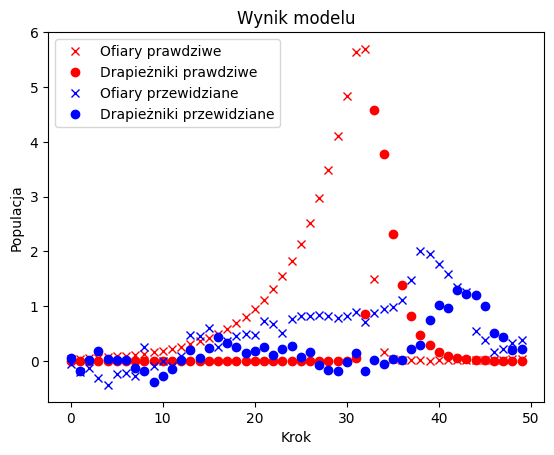

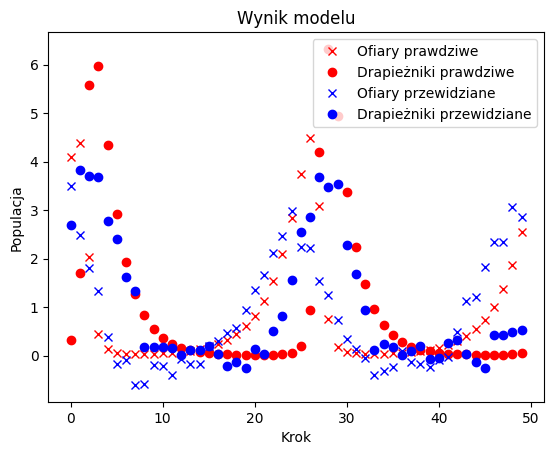

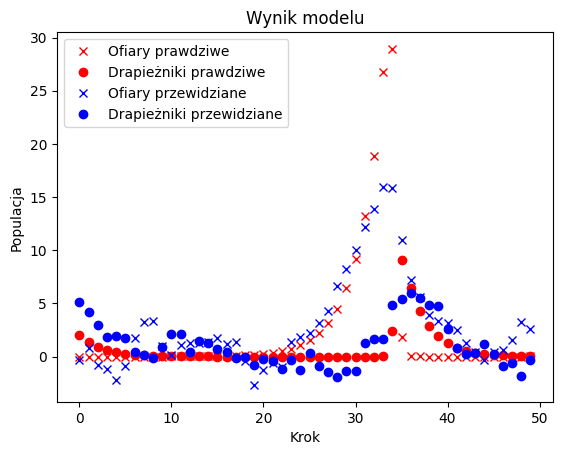

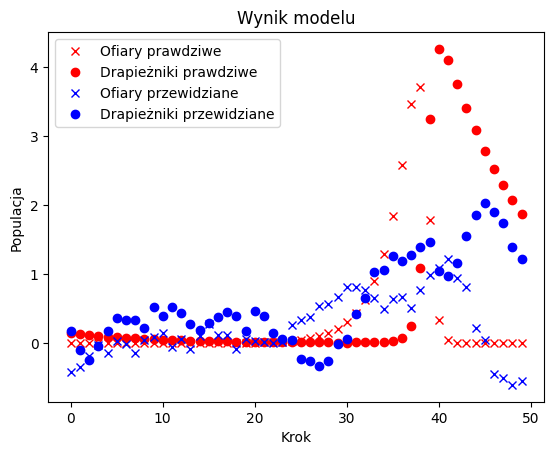

tensor(3.7632, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 14:
  batch 10 loss: 2.5194853398813963
  batch 20 loss: 2.289093055381034
  batch 30 loss: 2.51199199316544
  batch 40 loss: 2.578854210103853
  batch 50 loss: 2.3959801074851703
  batch 60 loss: 2.3923541159517425
  batch 70 loss: 2.778416773670373
  batch 80 loss: 2.887467860181782
  batch 90 loss: 2.3768146263908747
  batch 100 loss: 2.1584212040120567
  batch 110 loss: 2.313458216024536
  batch 120 loss: 2.1781702017111155
  batch 130 loss: 2.3753035680128143
  batch 140 loss: 2.2004108380009257
  batch 150 loss: 2.460572297758648
  batch 160 loss: 2.5059764033662217
  batch 170 loss: 2.7248786524310527
  batch 180 loss: 2.4366194763489286
  batch 190 loss: 2.876225437215286
  batch 200 loss: 2.900011053184173


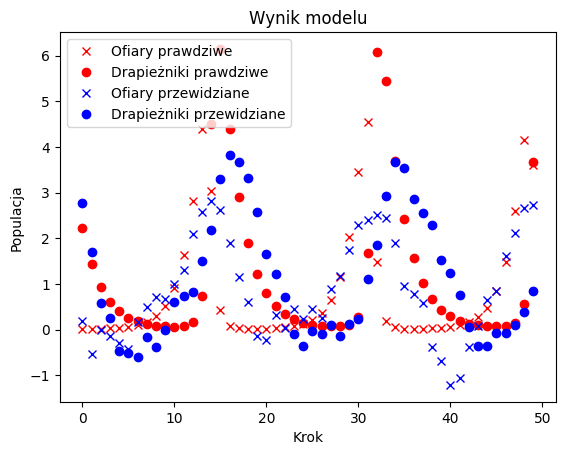

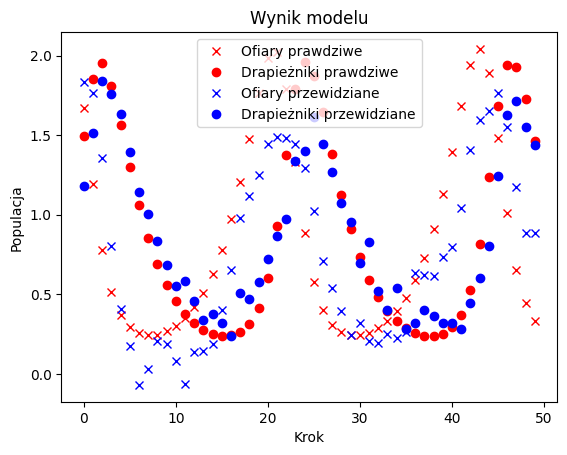

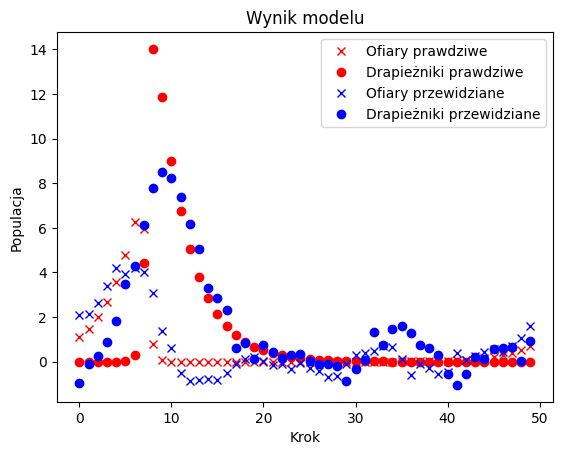

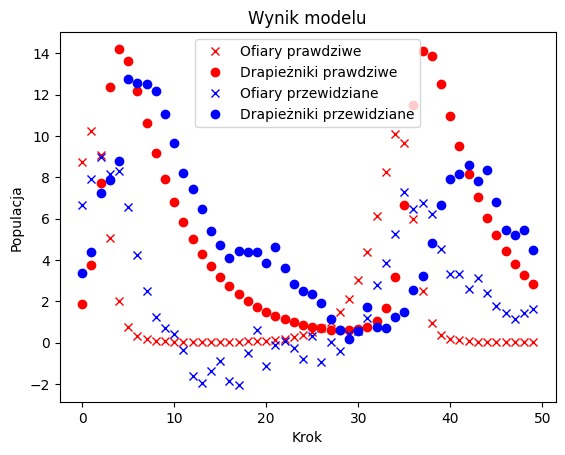

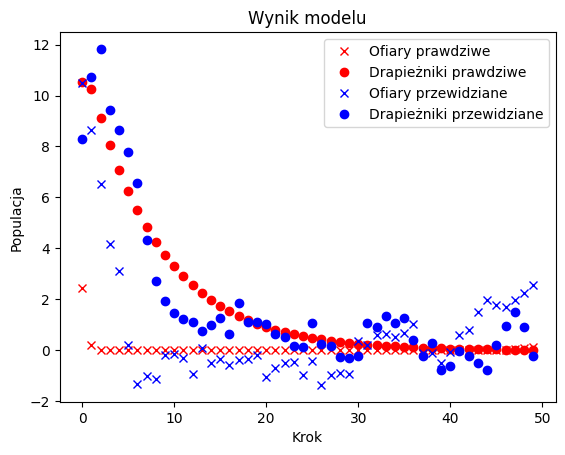

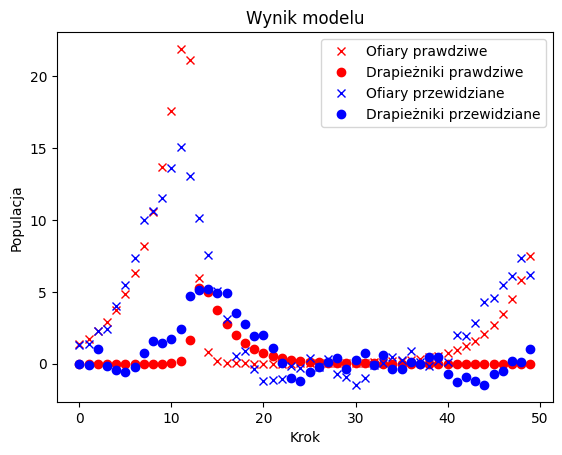

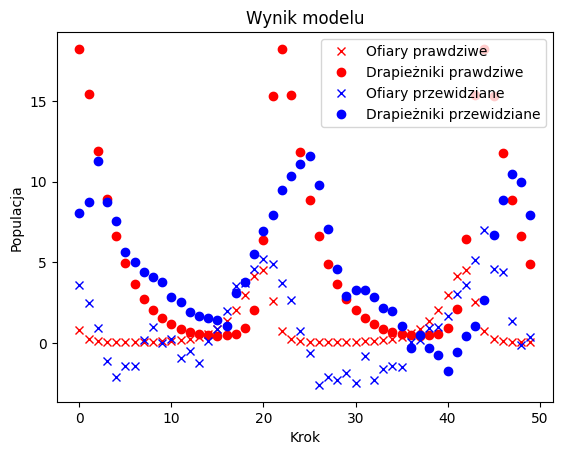

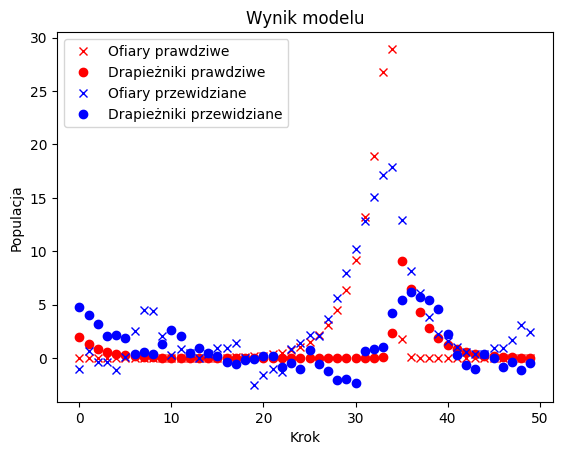

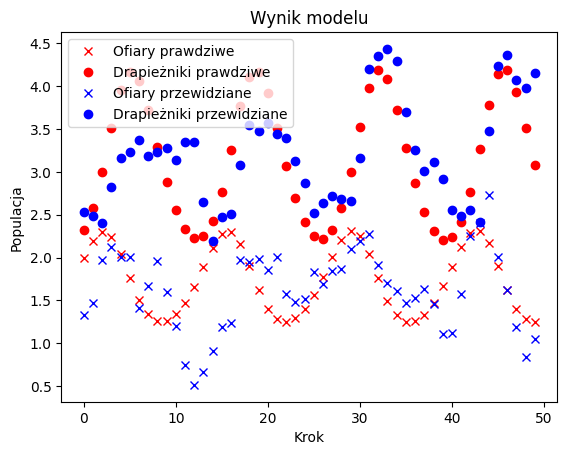

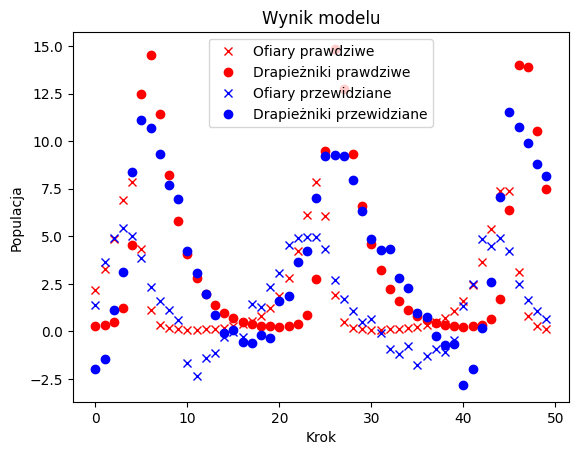

tensor(3.6893, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 15:
  batch 10 loss: 2.100464238932821
  batch 20 loss: 2.0679867819333704
  batch 30 loss: 2.5207429852858416
  batch 40 loss: 2.2244823022696165
  batch 50 loss: 2.7071451004231672
  batch 60 loss: 2.3013253163727243
  batch 70 loss: 2.7340450933624405
  batch 80 loss: 2.2600402255472196
  batch 90 loss: 2.4057721818919404
  batch 100 loss: 2.2081857759356645
  batch 110 loss: 2.2221175684565866
  batch 120 loss: 2.117381095732417
  batch 130 loss: 2.5887069526560897
  batch 140 loss: 1.7780276407328728
  batch 150 loss: 2.1665084200657683
  batch 160 loss: 2.2200355235734666
  batch 170 loss: 2.2608245312682542
  batch 180 loss: 2.982121086011088
  batch 190 loss: 2.654654801279534
  batch 200 loss: 2.801036748319766


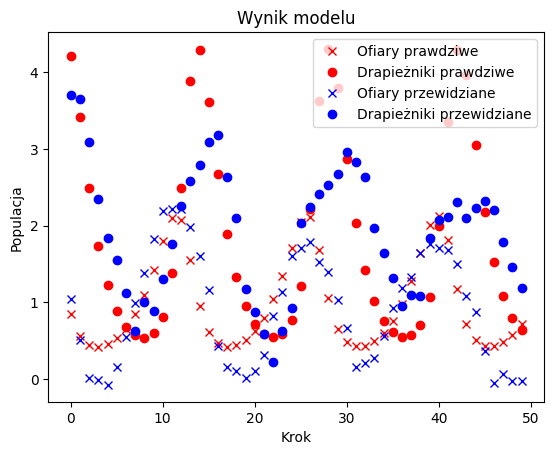

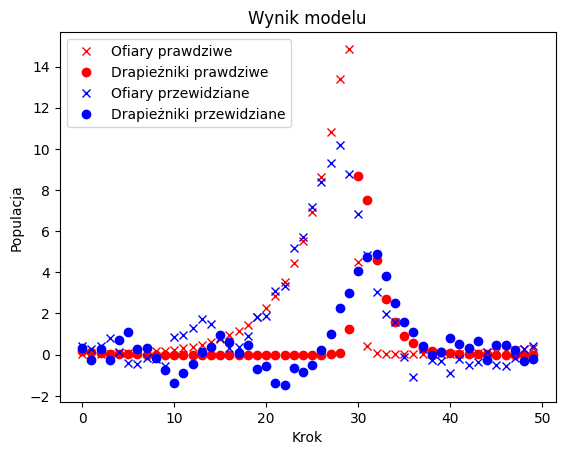

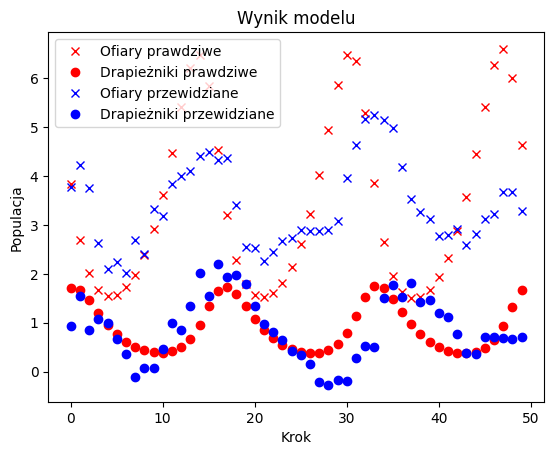

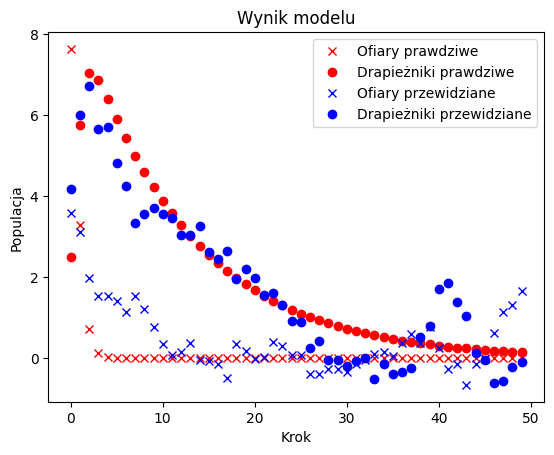

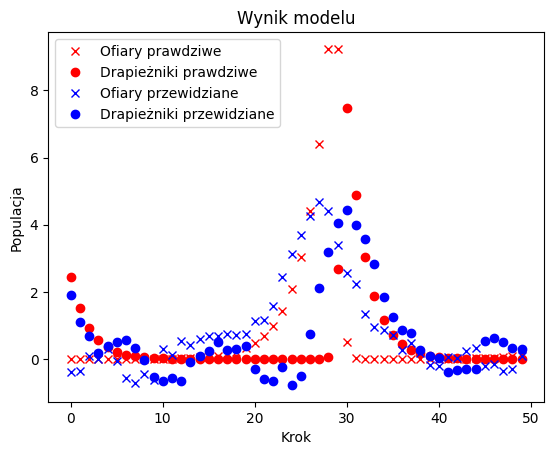

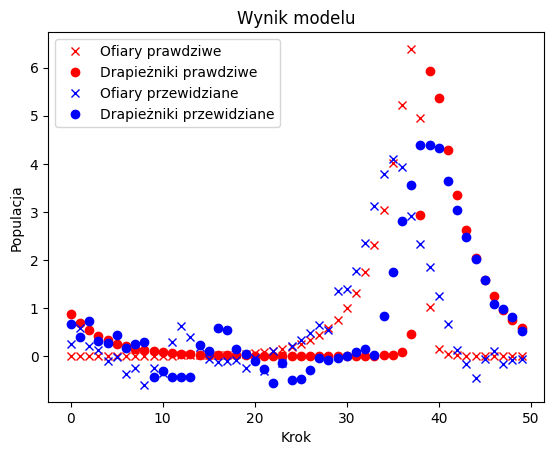

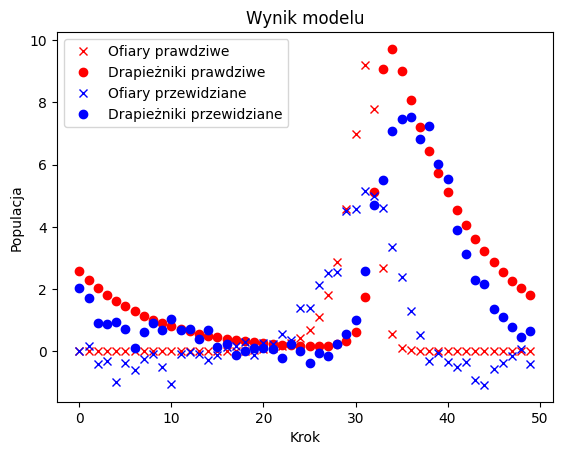

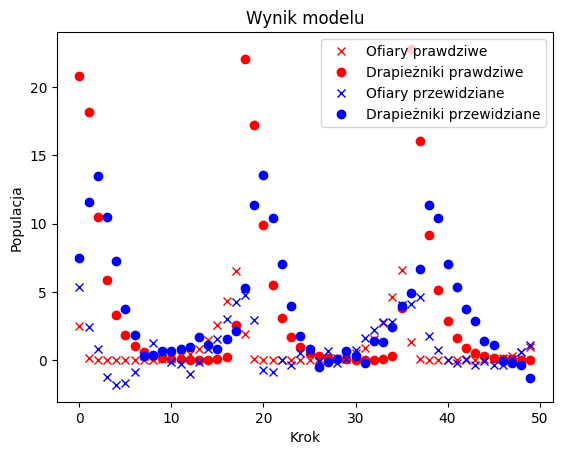

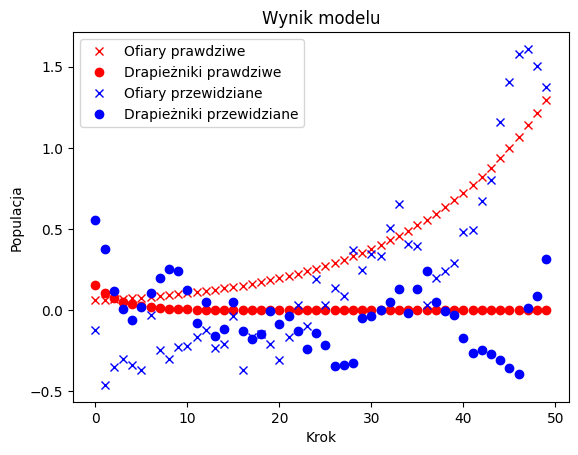

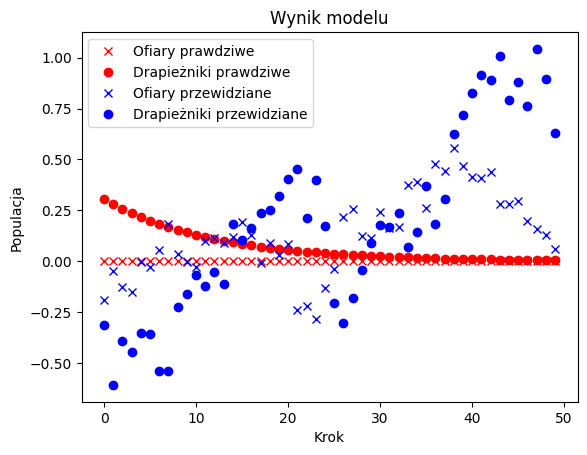

tensor(3.5606, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 16:
  batch 10 loss: 2.7848734741412784
  batch 20 loss: 2.279665635892744
  batch 30 loss: 2.72828188092346
  batch 40 loss: 2.0997473451815134
  batch 50 loss: 2.627141466613545
  batch 60 loss: 1.941118532643776
  batch 70 loss: 2.2207838507108906
  batch 80 loss: 2.282442443587641
  batch 90 loss: 2.1659748126799085
  batch 100 loss: 1.8784951682748772
  batch 110 loss: 2.10365791086502
  batch 120 loss: 2.88848580486371
  batch 130 loss: 1.9956489333117304
  batch 140 loss: 2.331115616893205
  batch 150 loss: 2.303893744310357
  batch 160 loss: 2.172650077459233
  batch 170 loss: 2.134099058577164
  batch 180 loss: 1.9205734488571622
  batch 190 loss: 2.1793744205359453
  batch 200 loss: 2.15013654607501


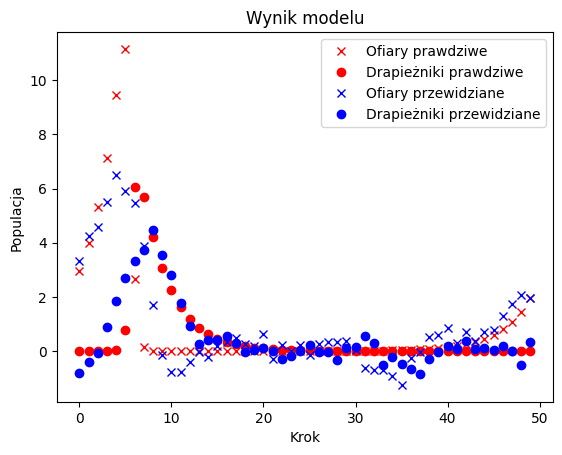

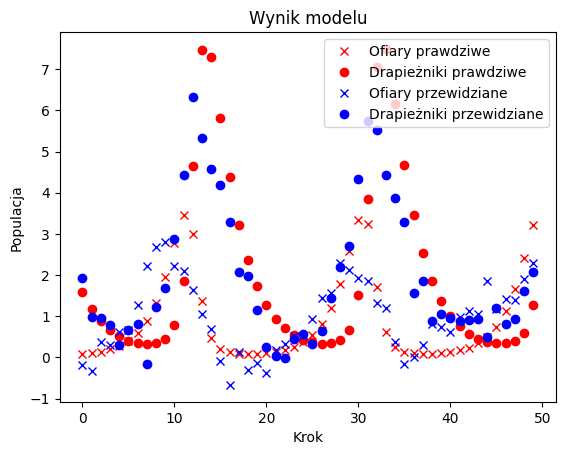

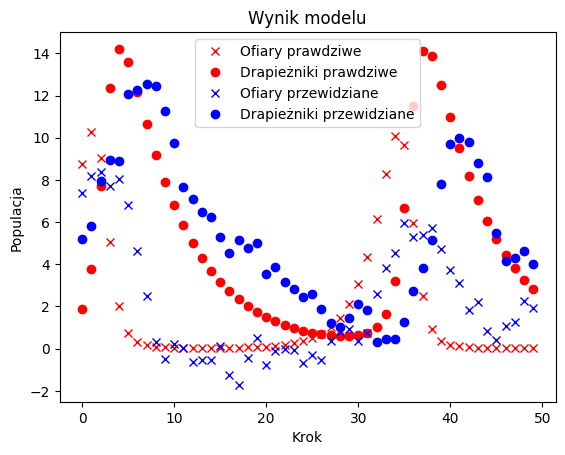

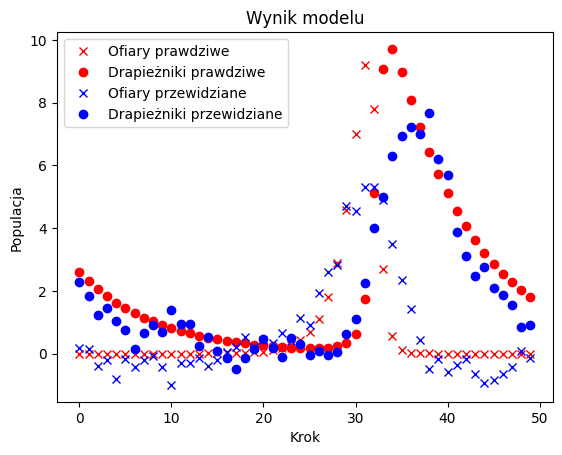

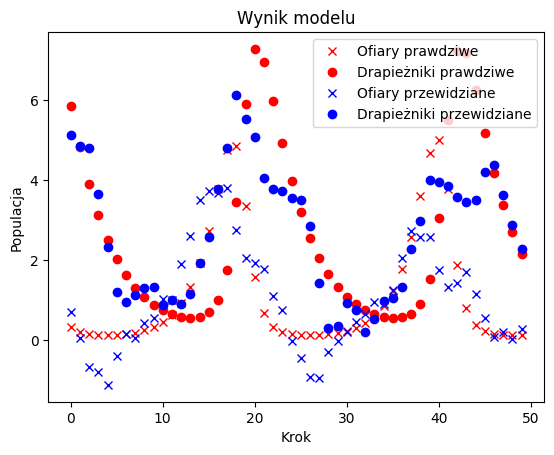

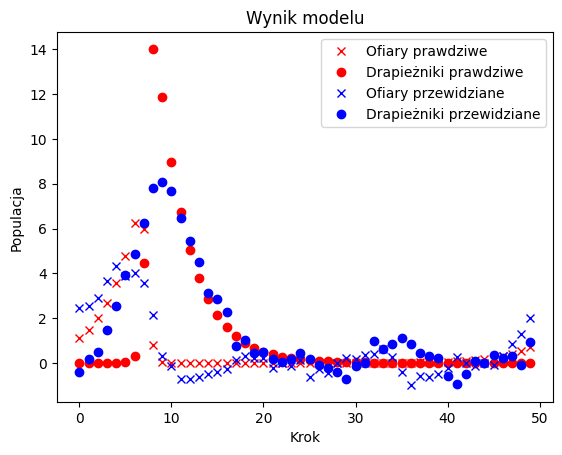

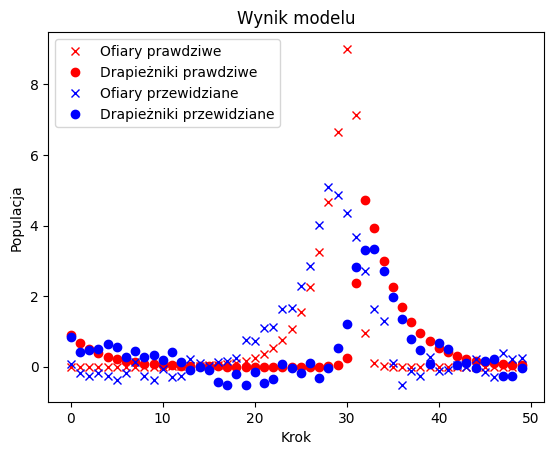

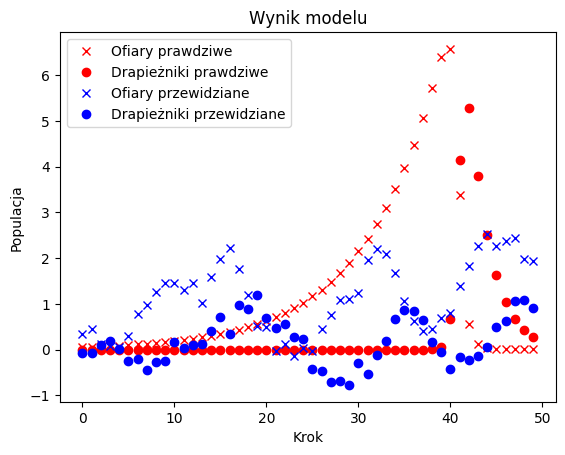

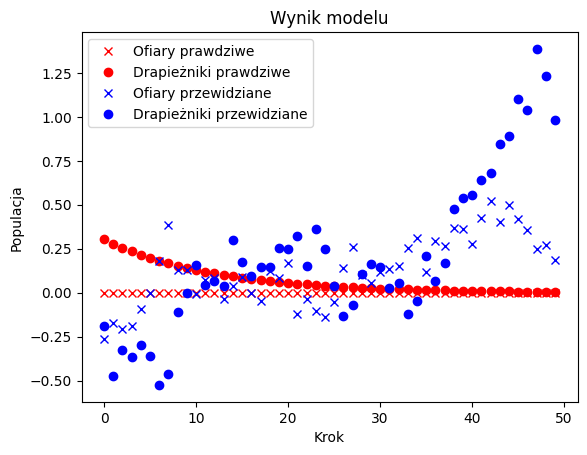

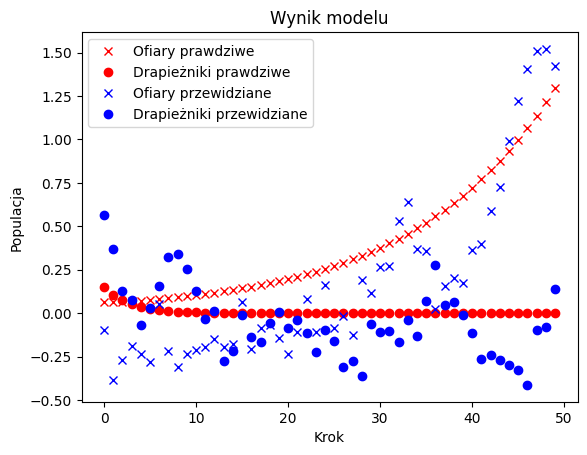

tensor(3.5320, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 17:
  batch 10 loss: 1.7034600574828485
  batch 20 loss: 2.18529534388895
  batch 30 loss: 2.0464431510462457
  batch 40 loss: 1.928080860105424
  batch 50 loss: 1.8314518619251015
  batch 60 loss: 2.2067871184434593
  batch 70 loss: 2.0540441245773176
  batch 80 loss: 2.560625205394491
  batch 90 loss: 2.5203175658671806
  batch 100 loss: 1.8413902019657626
  batch 110 loss: 2.3006198710964516
  batch 120 loss: 2.327358582011171
  batch 130 loss: 1.842747901854278
  batch 140 loss: 2.483734006146603
  batch 150 loss: 2.481181258481775
  batch 160 loss: 2.131457624194448
  batch 170 loss: 2.646129976038982
  batch 180 loss: 2.0312292906343505
  batch 190 loss: 1.7837497558308943
  batch 200 loss: 2.3815495812079055


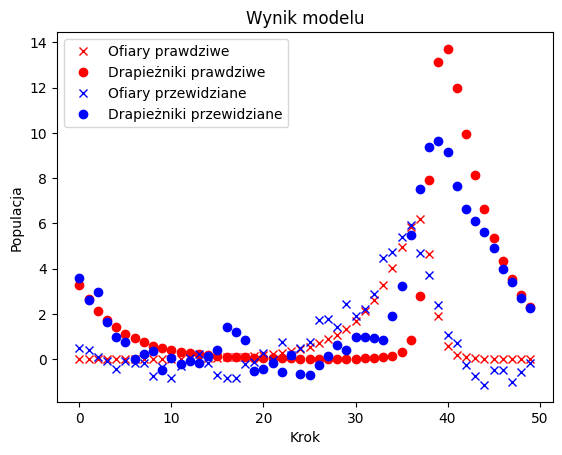

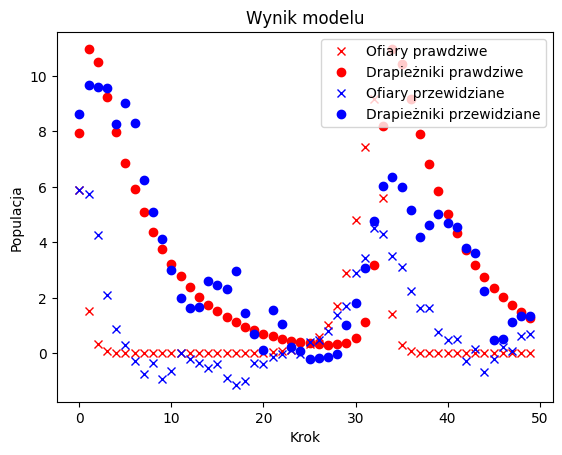

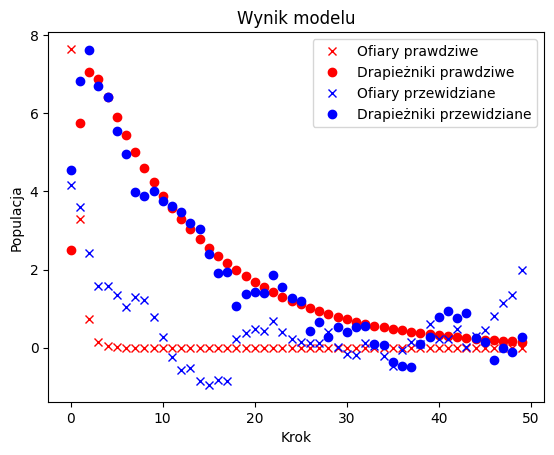

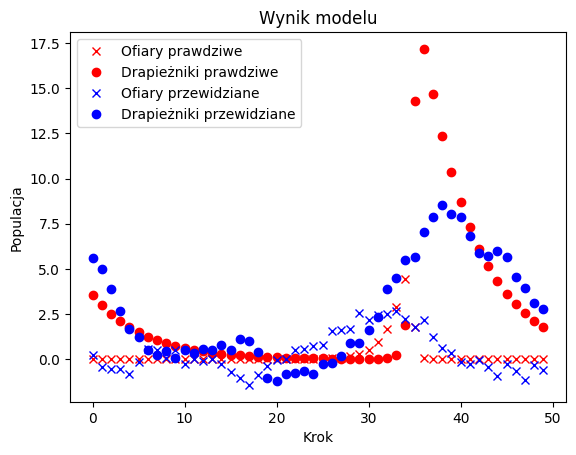

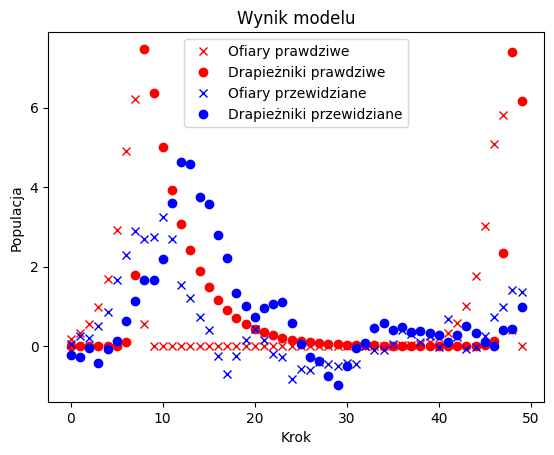

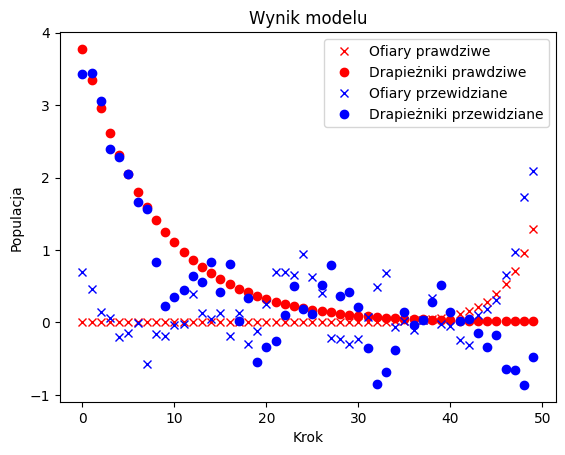

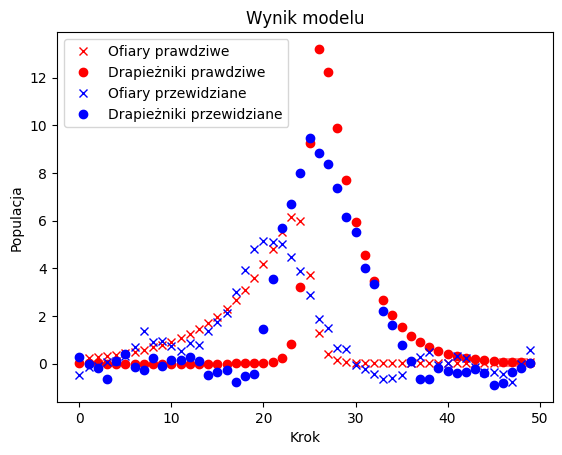

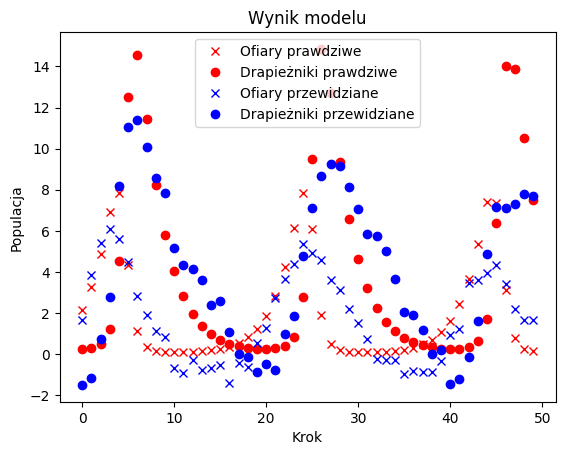

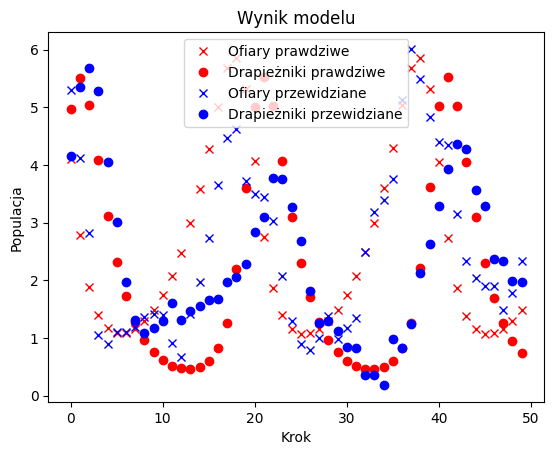

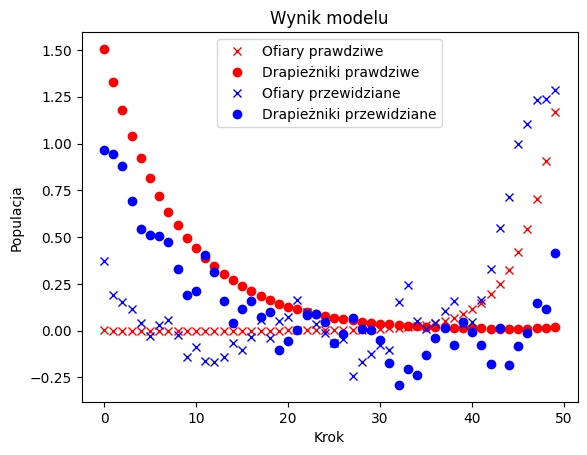

tensor(3.5773, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 18:
  batch 10 loss: 2.044079145473553
  batch 20 loss: 2.204459038037087
  batch 30 loss: 1.8717932707668303
  batch 40 loss: 2.0408919173192044
  batch 50 loss: 2.0312988317445035
  batch 60 loss: 2.0162633737210958
  batch 70 loss: 1.8027728973030317
  batch 80 loss: 1.6857853841852726
  batch 90 loss: 2.204536844952524
  batch 100 loss: 2.1245588918072476
  batch 110 loss: 2.0953296049865235
  batch 120 loss: 2.0679379903468025
  batch 130 loss: 1.7975455935217852
  batch 140 loss: 2.136019849505161
  batch 150 loss: 2.284886569188826
  batch 160 loss: 2.1672185276642812
  batch 170 loss: 2.0724969515658573
  batch 180 loss: 2.153923526739784
  batch 190 loss: 3.1419828958344937
  batch 200 loss: 1.6522251477685355


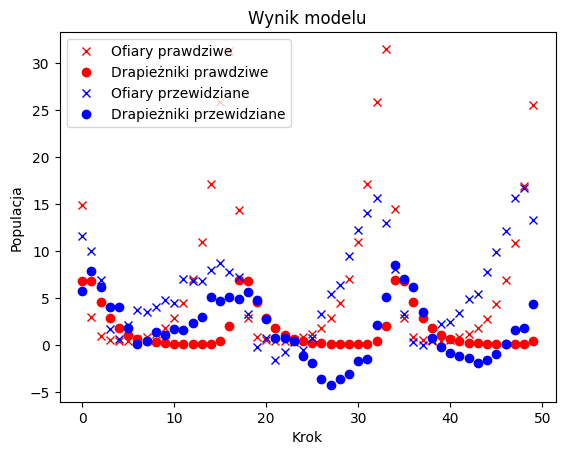

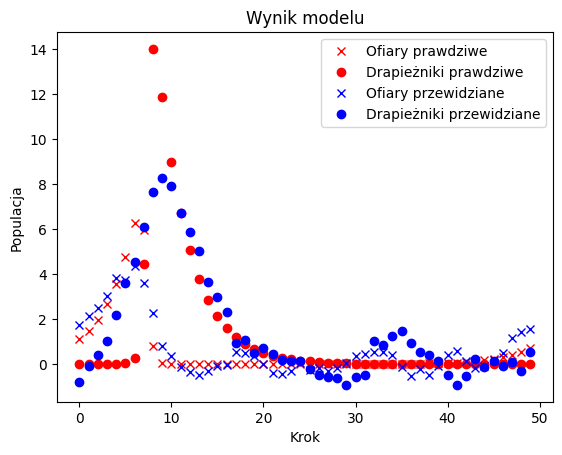

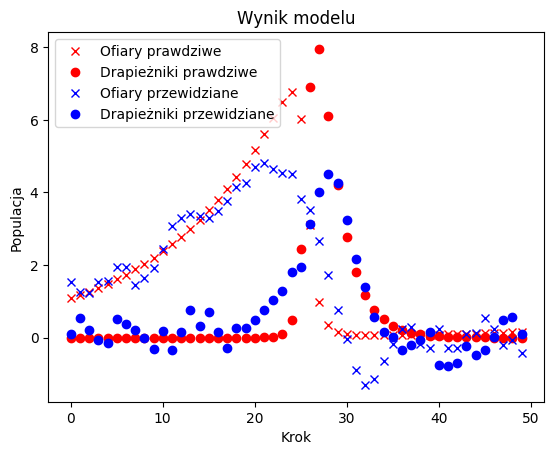

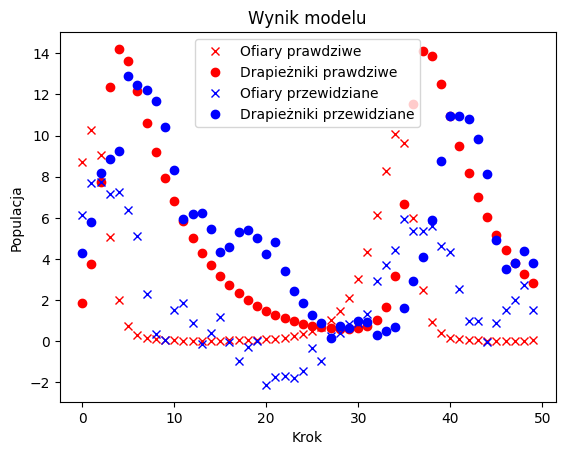

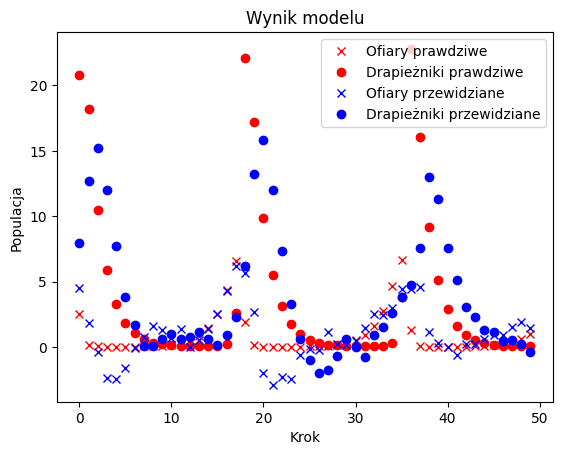

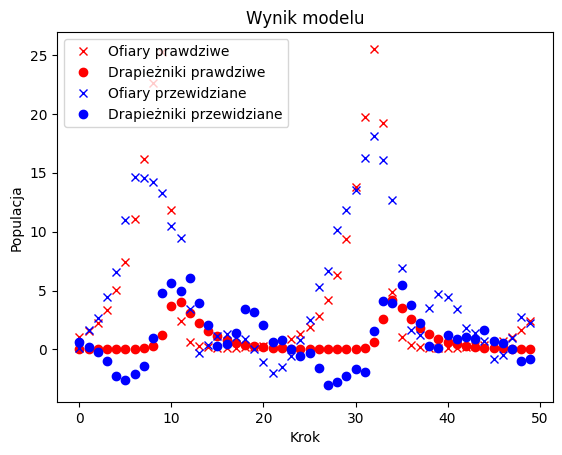

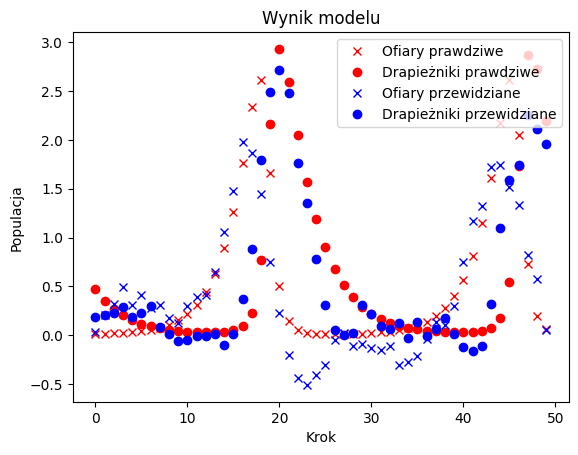

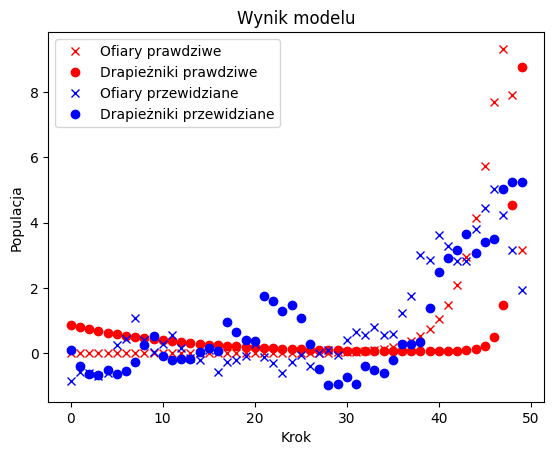

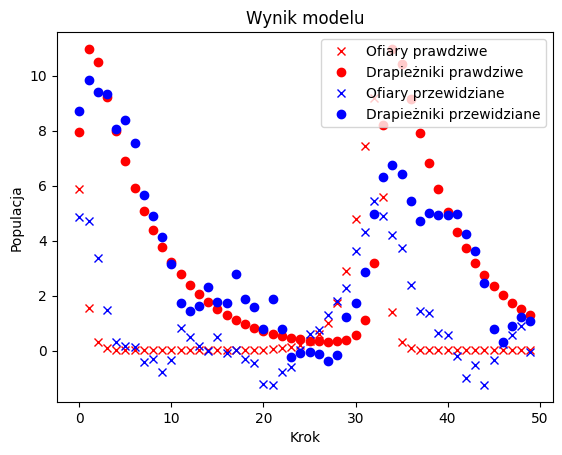

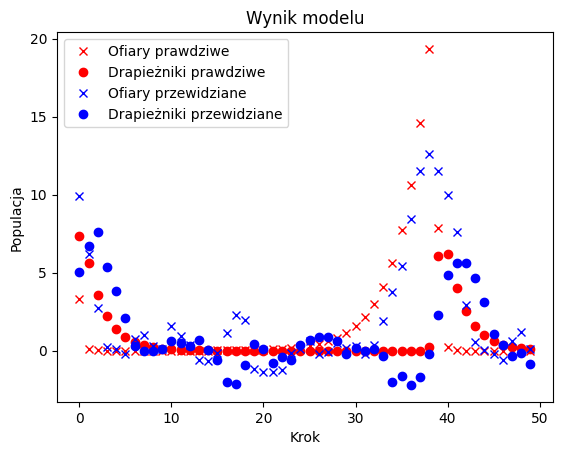

tensor(3.4661, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 19:
  batch 10 loss: 2.0432908286034137
  batch 20 loss: 2.072822881471062
  batch 30 loss: 2.1822985033033744
  batch 40 loss: 2.0893023976505276
  batch 50 loss: 1.9290717133394573
  batch 60 loss: 1.8817625168158378
  batch 70 loss: 2.0144640295537637
  batch 80 loss: 1.9175683479481034
  batch 90 loss: 2.5233151885496197
  batch 100 loss: 1.7870760119149929
  batch 110 loss: 2.455314546795388
  batch 120 loss: 2.0459633809689293
  batch 130 loss: 1.5967895520199988
  batch 140 loss: 2.057636779568173
  batch 150 loss: 2.0382442171060506
  batch 160 loss: 2.0498018117777455
  batch 170 loss: 2.291038643831796
  batch 180 loss: 1.7049709129740727
  batch 190 loss: 2.1134948260942124
  batch 200 loss: 1.8637384817275682


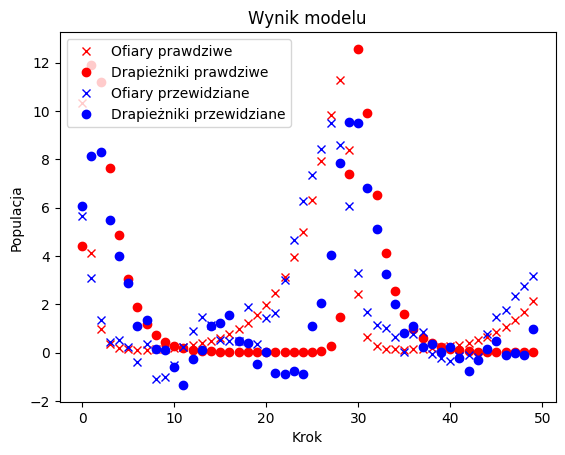

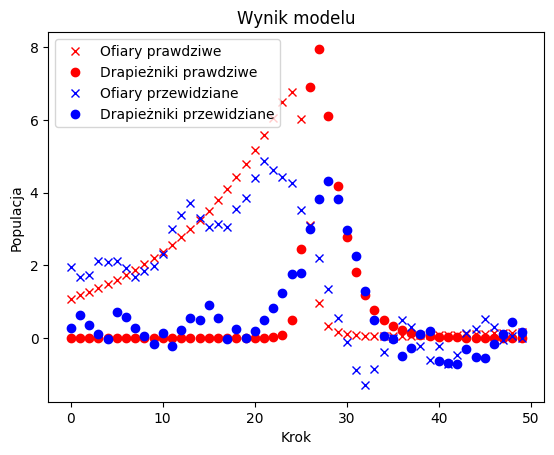

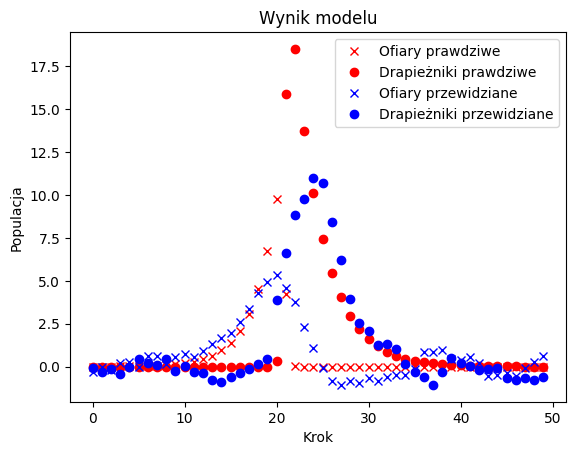

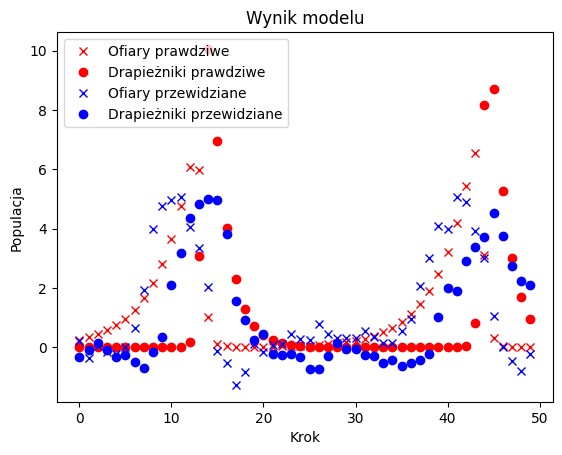

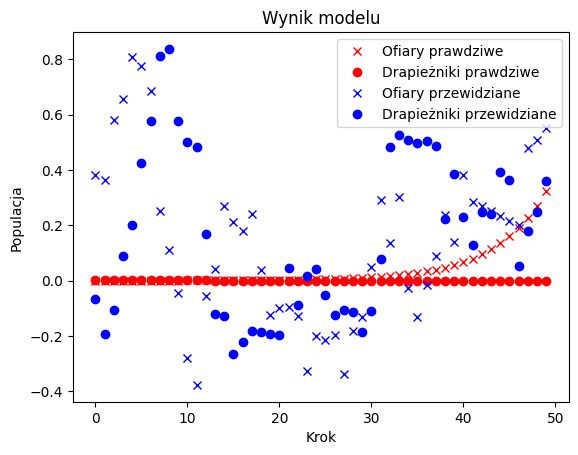

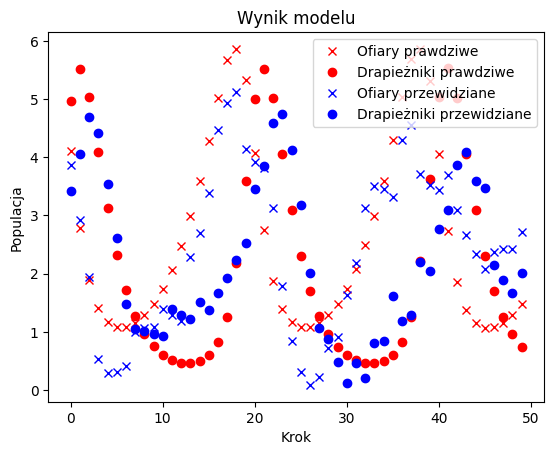

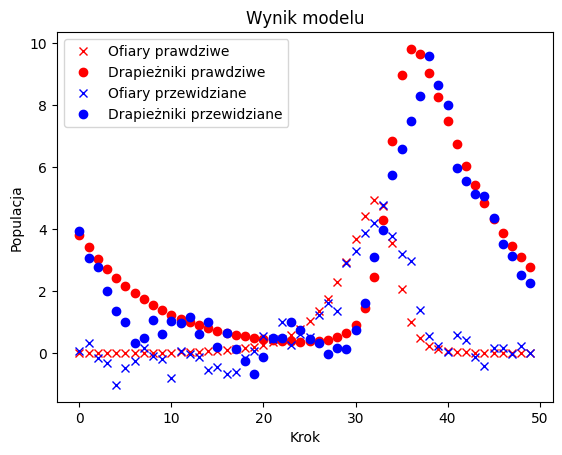

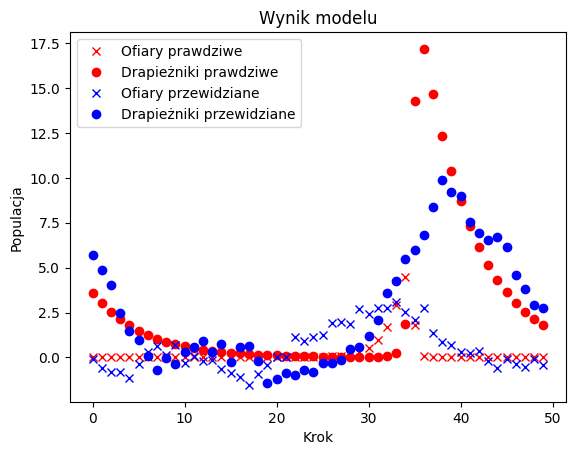

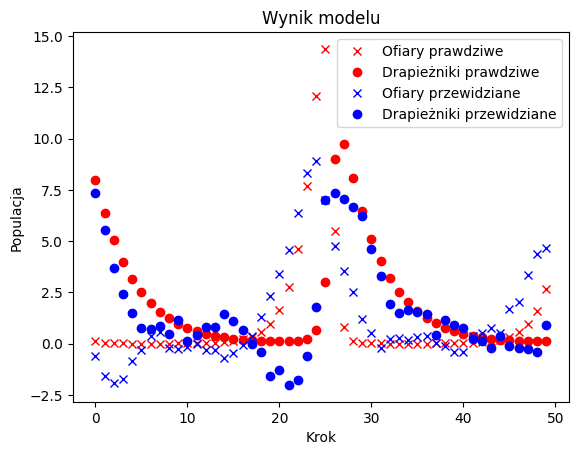

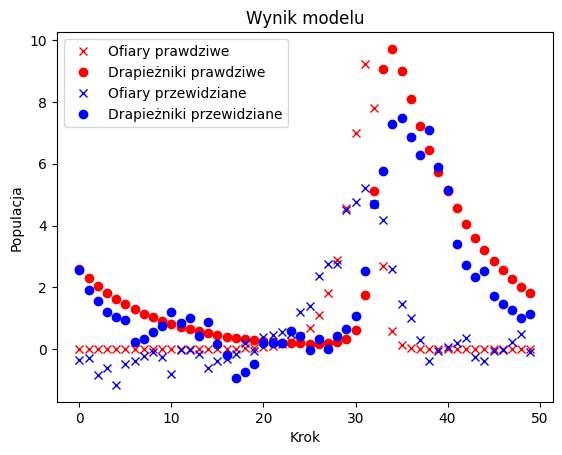

tensor(3.3498, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 20:
  batch 10 loss: 2.111373024357874
  batch 20 loss: 1.8522158977798147
  batch 30 loss: 1.9281103572471632
  batch 40 loss: 1.8974613049917566
  batch 50 loss: 2.19422390109997
  batch 60 loss: 1.9110501416021903
  batch 70 loss: 1.937230950177583
  batch 80 loss: 2.1486609950172335
  batch 90 loss: 1.6849114314084332
  batch 100 loss: 1.8390830539930973
  batch 110 loss: 1.8694940050291027
  batch 120 loss: 2.0827318415240264
  batch 130 loss: 1.8545302752092359
  batch 140 loss: 1.6586121812782662
  batch 150 loss: 2.4795706378672024
  batch 160 loss: 1.6272355025424798
  batch 170 loss: 2.200713165554924
  batch 180 loss: 1.8630585346135629
  batch 190 loss: 1.8638527237138718
  batch 200 loss: 1.9682291516281172


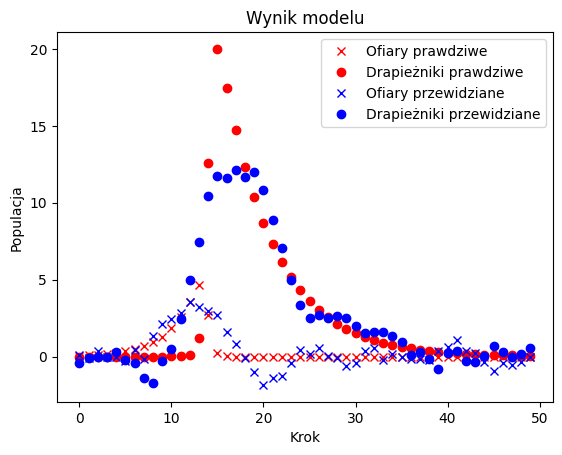

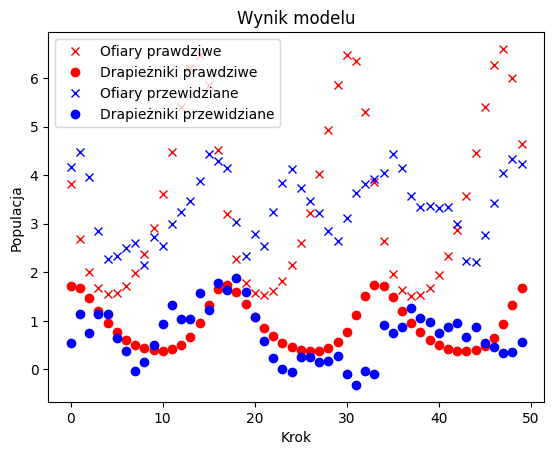

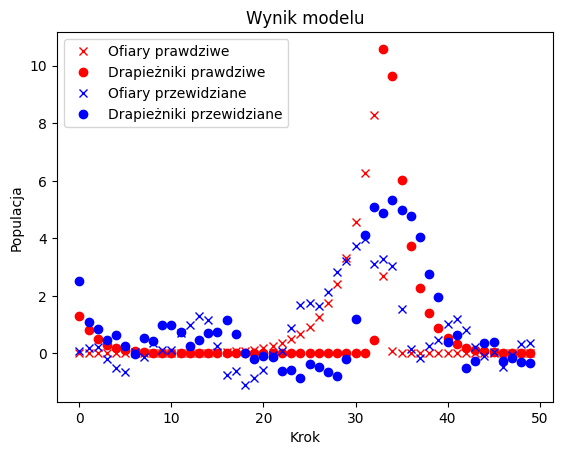

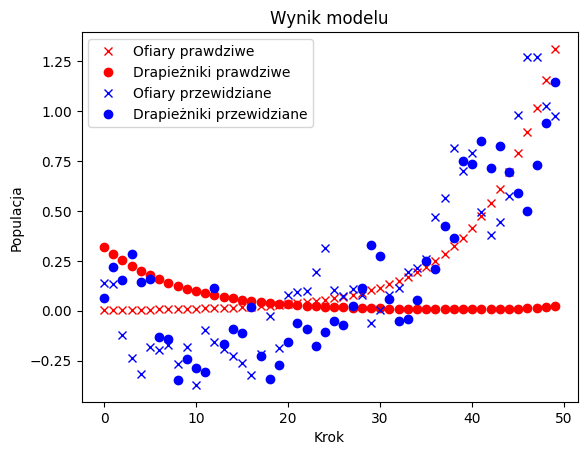

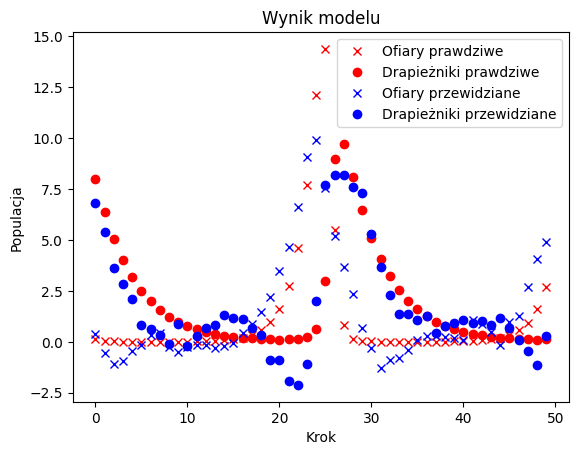

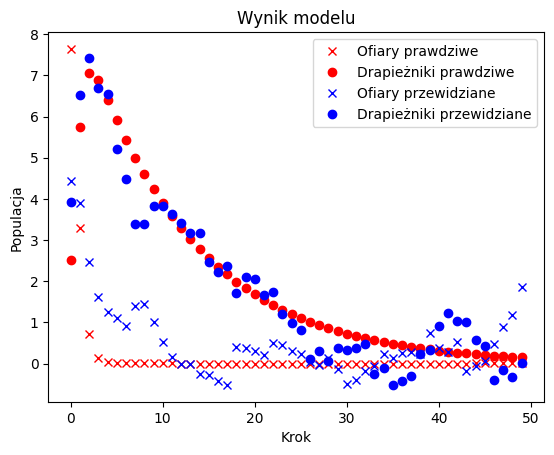

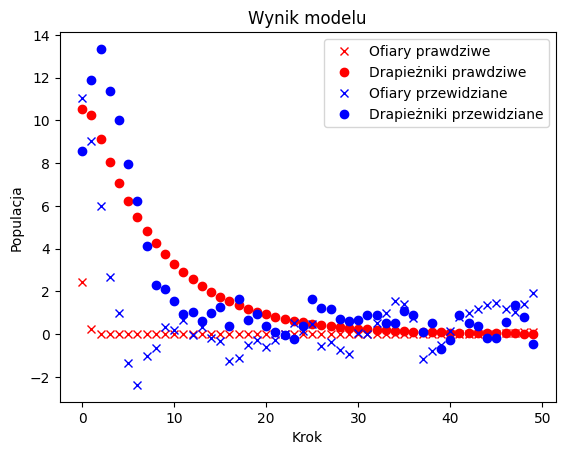

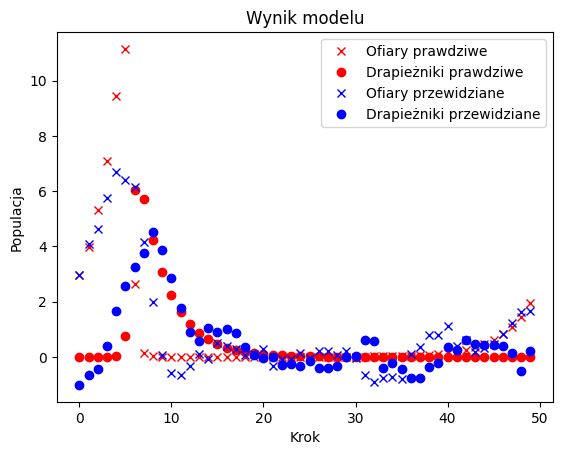

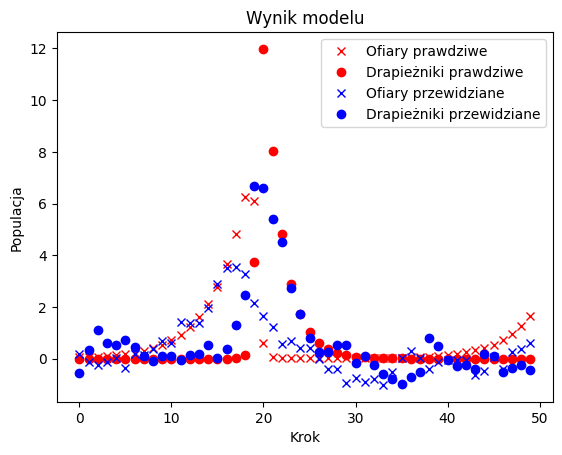

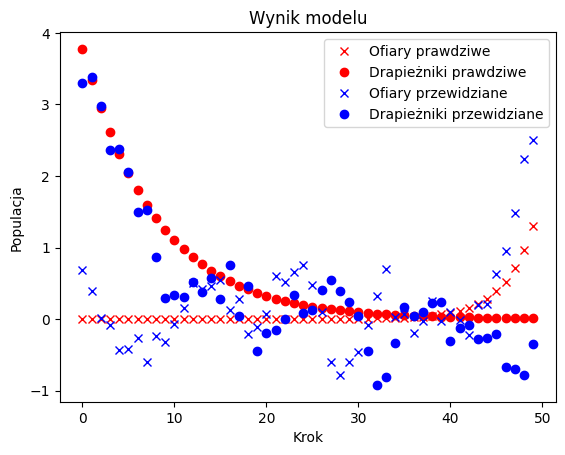

tensor(3.3895, dtype=torch.float64, grad_fn=<DivBackward0>)


In [7]:
for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    # We don't need gradients on to do reporting
    model.train(False)

    running_validation_loss = 0.0
    for i, validation_data in enumerate(test_dataloader):
        validation_inputs, validation_labels = validation_data
        validation_outputs = model(validation_inputs)
        validation_loss = loss_fn(validation_outputs, validation_labels)
        running_validation_loss += validation_loss
        
        prawdziwe = validation_labels.detach().numpy()[0]
        przewidziane = validation_outputs.detach().numpy()[0]
        prawdziwe = np.reshape(prawdziwe, (2, k), order = 'F')
        przewidziane = np.reshape(przewidziane, (2, k), order = 'F')
        x_0, y_0 = prawdziwe
        x_1, y_1 = przewidziane
        
        plt.plot(x_0, 'xr', label = 'Ofiary prawdziwe')
        plt.plot(y_0, 'or', label = 'Drapieżniki prawdziwe')
        plt.plot(x_1, 'xb', label = 'Ofiary przewidziane')
        plt.plot(y_1, 'ob', label = 'Drapieżniki przewidziane')
        plt.title("Wynik modelu")
        plt.xlabel('Krok')
        plt.ylabel('Populacja')
        plt.legend()

        plt.show()

    avg_validation_loss = running_validation_loss / len(test_dataloader)

    # Log the running loss averaged per batch
    # for both training and validation
    print(avg_validation_loss)
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training': avg_loss, 'Validation': avg_validation_loss},
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_validation_loss < best_validation_loss:
        best_validation_loss = avg_validation_loss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        # torch.save(model.state_dict(), model_path)

    epoch_number += 1
